# **INIT**

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=b80c99838215dcb08570107bcfe3152206afe51f046a0f86d15ee3d57567a04c
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **RUN ONLY A SINGLE TIME(only when you want to clear the processed_symbols csv or create it for the first time) AND CLEAR THE MODELS FOLDER IN GOOGLE DRIVE(be very careful with this)**

In [ ]:
import pandas as pd
processed_symbols = pd.DataFrame(columns= ["processed_symbols"])
processed_symbols.to_csv(f"/content/drive/MyDrive/processed_symbols_50.csv")



In [ ]:
import os
folder = "models_nifty"
os.chdir(f'/content/drive/MyDrive/{folder}')
for filename in os.listdir():
    os.remove(filename)

# **MODEL CREATOR**


In [ ]:
import yfinance as yf
import pandas as pd

def get_stock_symbols(exchange):
    df = pd.read_csv(f"/content/drive/MyDrive/{exchange}.csv")
    print(df)
    # Extract the 'Symbol' column as a list
    symbols = df['SYMBOL \n'].to_list()
    return list(symbols)

# Get NASDAQ symbols
symbols = get_stock_symbols('nifty')


# Combine the lists if needed
all_symbols = symbols

# Print or use the list as needed
print(all_symbols)
print(len(all_symbols))

     SYMBOL \n    OPEN \n    HIGH \n     LOW \n PREV. CLOSE \n     LTP \n  \
0     NIFTY 50  19,674.75  19,806.00  19,667.45      19,765.20  19,731.80   
1      SBILIFE   1,354.00   1,434.45   1,354.00       1,359.95   1,413.70   
2   APOLLOHOSP   5,332.20   5,493.35   5,306.15       5,338.75   5,485.00   
3     HDFCLIFE     632.85     660.00     632.00         634.95     652.30   
4           LT   3,050.00   3,115.45   3,045.15       3,051.15   3,106.25   
5   TATACONSUM     922.00     934.00     921.00         920.05     934.00   
6     DIVISLAB   3,550.00   3,619.00   3,550.00       3,548.25   3,600.00   
7   HINDUNILVR   2,465.00   2,533.50   2,465.00       2,491.20   2,527.00   
8       GRASIM   1,941.05   1,983.60   1,940.35       1,942.60   1,970.45   
9   BAJAJ-AUTO   5,556.90   5,674.95   5,479.35       5,550.90   5,620.25   
10  HEROMOTOCO   3,289.70   3,368.80   3,280.05       3,280.05   3,320.00   
11  ASIANPAINT   3,150.00   3,228.25   3,145.65       3,130.30   3,167.00   

In [ ]:
symbols = all_symbols[1:51]
print(symbols)
print(len(symbols))

['SBILIFE', 'APOLLOHOSP', 'HDFCLIFE', 'LT', 'TATACONSUM', 'DIVISLAB', 'HINDUNILVR', 'GRASIM', 'BAJAJ-AUTO', 'HEROMOTOCO', 'ASIANPAINT', 'DRREDDY', 'CIPLA', 'NESTLEIND', 'POWERGRID', 'M&M', 'EICHERMOT', 'MARUTI', 'SUNPHARMA', 'TATASTEEL', 'ADANIENT', 'TATAMOTORS', 'TITAN', 'ITC', 'TCS', 'ULTRACEMCO', 'BRITANNIA', 'UPL', 'COALINDIA', 'LTIM', 'HDFCBANK', 'HCLTECH', 'INDUSINDBK', 'RELIANCE', 'BHARTIARTL', 'JSWSTEEL', 'ADANIPORTS', 'NTPC', 'BAJAJFINSV', 'TECHM', 'INFY', 'WIPRO', 'KOTAKBANK', 'HINDALCO', 'ICICIBANK', 'BAJFINANCE', 'BPCL', 'ONGC', 'AXISBANK', 'SBIN']
50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import yfinance as yf
import ta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tqdm.notebook import tqdm
from IPython.display import HTML, clear_output
import datetime

count = 0
total_symbols = len(symbols)
processed_symbols = pd.read_csv(f"/content/drive/MyDrive/processed_symbols_50.csv")
initial_value = len(processed_symbols)
progress_bar_sites = tqdm(total=total_symbols, initial = initial_value, desc="Processing.....", leave = True)
for symbol in symbols:
    # Check if the specified Site ID already exists in the DataFrame
    existing_row = processed_symbols[processed_symbols['processed_symbols'] == symbol].index
    if not existing_row.empty:
      print(f"Site ID {symbol} already processed, skipping to the next one.....")
      continue
    # Define the stock symbol and the date range you're interested in

    stock_symbol = f"{symbol}.NS"
    start_date = '1950-01-01'
    # Get the current date
    current_date = datetime.datetime.today()

    # Format the current date as a string
    end_date = current_date.strftime('%Y-%m-%d')

    # Download historical stock data
    data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Save the data to a CSV file
    data.to_csv('/content/close_price.csv', index=True)

    # Display the first few rows of the dataset
    print(data.head())
    print(data.tail())

    # Check for missing values
    print(data.isnull().sum())

    # Visualize the data
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'{stock_symbol} Stock Price Over Time')
    plt.legend()
    plt.show()

    # Reset the index to make Date a regular column
    data.reset_index(inplace=True)

    # Convert the 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])

    # Set 'Date' as the index again (useful for time-series analysis)
    data.set_index('Date', inplace=True)

    # Display the updated dataset
    print(data.head())

    # Add various technical indicators
    data = ta.add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=True)
    data.to_csv('/content/close_price.csv', index=True)
    # Display the updated dataset with technical indicators
    print(data)

    # Remove the open, high, low, and adjusted close prices from the dataframe
    data = data.drop(columns=['Open', 'High', 'Low', 'Adj Close'])
    # Print the dataframe
    print(data)

    # Define the percentage for training set
    train_percentage = 1

    # Calculate the index to split the data
    split_index = int(len(data) * train_percentage)

    # Split the data into training and testing sets
    train_data = data.iloc[:split_index]
    #test_data = data.iloc[split_index:]

    # Display the shapes of the training and testing sets
    print("Training set shape:", train_data.shape)
    #print("Testing set shape:", test_data.shape)


    # Initialize the scaler
    scaler = StandardScaler()

    # Fit and transform the scaler on the training data
    train_scaled = scaler.fit_transform(train_data.drop('Close', axis=1))

    # Transform the testing data using the same scaler
    #test_scaled = scaler.transform(test_data.drop('Close', axis=1))

    # Display the first few rows of the scaled training data
    print(pd.DataFrame(train_scaled, columns=train_data.columns[:-1]))

    # Define the input features and target variable for training set
    X_train = train_scaled
    y_train = train_data['Close'].values

    # Define the input features and target variable for testing set
    #X_test = test_scaled
    #y_test = test_data['Close'].values

    # Display the shapes of the input and output for both training and testing sets
    print("Training set - Input shape:", X_train.shape, " Output shape:", y_train.shape)
    #print("Testing set - Input shape:", X_test.shape, " Output shape:", y_test.shape)




    # Reshape data for LSTM input (assuming a time series sequence)
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    #X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Define the LSTM model
    model = Sequential()

    # LSTM layer with 50 units and 'relu' activation function (you can experiment with other activations)
    model.add(LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

    # Dense output layer with linear activation (common for regression tasks)
    model.add(Dense(1, activation='linear'))

    # Compile the model with the Adam optimizer and Huber loss function
    model.compile(optimizer=Adam(learning_rate=0.001), loss='huber_loss')

    # Print the model summary
    model.summary()

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=200, batch_size=32, verbose=1)

    model.save(f"/content/drive/MyDrive/models_nifty/model_{symbol}.h5")
    # Add the processed symbol to the DataFrame
    processed_symbols = processed_symbols.append({"processed_symbols": symbol}, ignore_index=True)
    processed_symbols.to_csv("/content/drive/MyDrive/processed_symbols_50.csv")

    count = count+1
    print("Number of models trained: ", count)
    progress_bar_sites.update(1)

progress_bar_sites.close()

Processing.....: 100%|##########| 50/50 [00:00<?, ?it/s]

Site ID SBILIFE already processed, skipping to the next one.....
Site ID APOLLOHOSP already processed, skipping to the next one.....
Site ID HDFCLIFE already processed, skipping to the next one.....
Site ID LT already processed, skipping to the next one.....
Site ID TATACONSUM already processed, skipping to the next one.....
Site ID DIVISLAB already processed, skipping to the next one.....
Site ID HINDUNILVR already processed, skipping to the next one.....
Site ID GRASIM already processed, skipping to the next one.....
Site ID BAJAJ-AUTO already processed, skipping to the next one.....
Site ID HEROMOTOCO already processed, skipping to the next one.....
Site ID ASIANPAINT already processed, skipping to the next one.....
Site ID DRREDDY already processed, skipping to the next one.....
Site ID CIPLA already processed, skipping to the next one.....
Site ID NESTLEIND already processed, skipping to the next one.....
Site ID POWERGRID already processed, skipping to the next one.....
Site ID M

# **ENSEMBLE**

### **PRE-PROCESSING**

In [ ]:
import pandas as pd
processed_symbols = pd.read_csv(f"/content/drive/MyDrive/processed_symbols_50.csv")
symbols = list(processed_symbols["processed_symbols"])
print(symbols)
print(len(symbols))


['SBILIFE', 'APOLLOHOSP', 'HDFCLIFE', 'LT', 'TATACONSUM', 'DIVISLAB', 'HINDUNILVR', 'GRASIM', 'BAJAJ-AUTO', 'HEROMOTOCO', 'ASIANPAINT', 'DRREDDY', 'CIPLA', 'NESTLEIND', 'POWERGRID', 'M&M', 'EICHERMOT', 'MARUTI', 'SUNPHARMA', 'TATASTEEL', 'ADANIENT', 'TATAMOTORS', 'TITAN', 'ITC', 'TCS', 'ULTRACEMCO', 'BRITANNIA', 'UPL', 'COALINDIA', 'LTIM', 'HDFCBANK', 'HCLTECH', 'INDUSINDBK', 'RELIANCE', 'BHARTIARTL', 'JSWSTEEL', 'ADANIPORTS', 'NTPC', 'BAJAJFINSV', 'TECHM', 'INFY', 'WIPRO', 'KOTAKBANK', 'HINDALCO', 'ICICIBANK', 'BAJFINANCE', 'BPCL', 'ONGC', 'AXISBANK', 'SBIN']
50


[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
1996-01-01  0.794921  0.796679  0.791015  0.796679   0.517830  204800
1996-01-02  0.794921  0.798828  0.793457  0.793457   0.515736  204800
1996-01-03  0.798828  0.798828  0.798828  0.798828   0.519227  102400
1996-01-04  0.791015  0.794921  0.791015  0.793554   0.515799  307200
1996-01-05  0.784179  0.784179  0.784179  0.784179   0.509705   51200
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-05  1634.000000  1637.349976  1602.000000  1606.500000  1606.500000   
2024-03-06  1602.800049  1620.150024  1576.000000  1617.550049  1617.550049   
2024-03-07  1616.599976  1628.449951  1604.199951  1616.449951  1616.449951   
2024-03-11  1608.150024  1613.800049  1588.000000  1600.599976  1600.599976   
2024-03-12  1600.000000  1625.000000

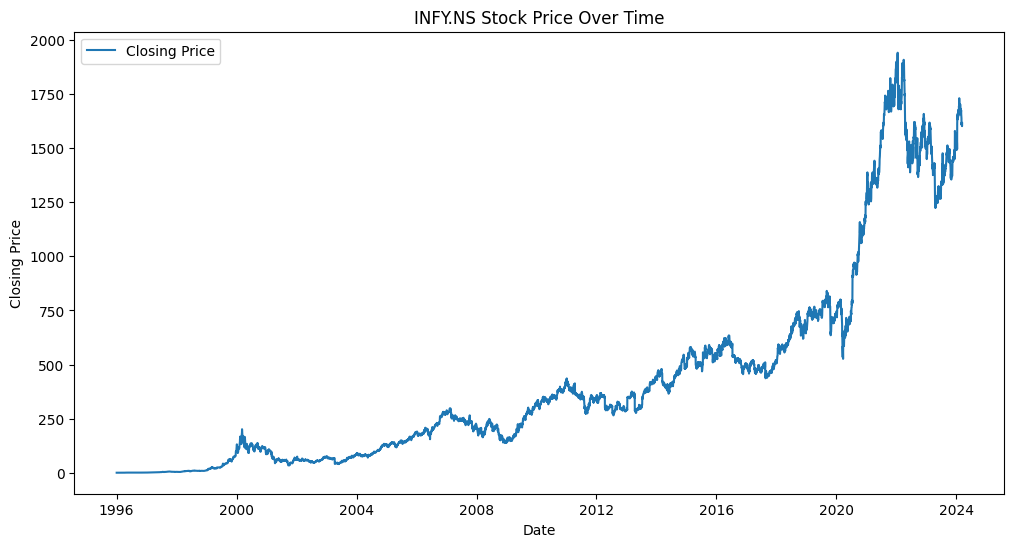

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
1996-01-01  0.794921  0.796679  0.791015  0.796679   0.517830  204800
1996-01-02  0.794921  0.798828  0.793457  0.793457   0.515736  204800
1996-01-03  0.798828  0.798828  0.798828  0.798828   0.519227  102400
1996-01-04  0.791015  0.794921  0.791015  0.793554   0.515799  307200
1996-01-05  0.784179  0.784179  0.784179  0.784179   0.509705   51200
                  Close   Volume    volume_adi  volume_obv  volume_cmf  \
Date                                                                     
1996-01-01     0.796679   204800  2.048000e+05      204800    1.000000   
1996-01-02     0.793457   204800  0.000000e+00           0    0.000000   
1996-01-03     0.798828   102400  0.000000e+00      102400    0.000000   
1996-01-04     0.793554   307200  9.217735e+04     -204800    0.112521   
1996-01-05     0.784179    51200  9.217735e+04     -256000    0.10

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import yfinance as yf
import ta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
import datetime
# Define the stock symbol and the date range you're interested in
stock_symbol = "INFY.NS"
start_date = '1950-01-01'
# Get the current date
current_date = datetime.datetime.today()

# Format the current date as a string
end_date = current_date.strftime('%Y-%m-%d')
# Download historical stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv('/content/drive/MyDrive/test/close_price.csv', index=True)

# Display the first few rows of the dataset
print(data.head())
print(data.tail())

# Check for missing values
print(data.isnull().sum())

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{stock_symbol} Stock Price Over Time')
plt.legend()
plt.show()

# Reset the index to make Date a regular column
data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index again (useful for time-series analysis)
data.set_index('Date', inplace=True)

# Display the updated dataset
print(data.head())

# Add various technical indicators
data = ta.add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=True)
data.to_csv('/content/drive/MyDrive/test/close_price.csv', index=True)

# Remove the open, high, low, and adjusted close prices from the dataframe
data = data.drop(columns=['Open', 'High', 'Low', 'Adj Close'])
# Display the updated dataset with technical indicators
print(data)




# Define the percentage for training set
train_percentage = 1

# Calculate the index to split the data
split_index = int(len(data) * train_percentage)

# Split the data into training and testing sets
test_data = data.iloc[:split_index]


# Display the shapes of the training and testing sets
print("Test set shape:", test_data.shape)



# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
test_scaled = scaler.fit_transform(test_data.drop('Close', axis=1))



# Display the first few rows of the scaled training data
print(pd.DataFrame(test_scaled, columns=test_data.columns[:-1]))

# Define the input features and target variable for training set
X_test = test_scaled
y_test = test_data['Close'].values



# Display the shapes of the input and output for both training and testing sets
print("Test set - Input shape:", X_test.shape, " Output shape:", y_test.shape)
#print("Testing set - Input shape:", X_test.shape, " Output shape:", y_test.shape)




# Reshape data for LSTM input (assuming a time series sequence)
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
display(data)

,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-01,0.796679,204800,2.048000e+05,204800,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.794791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.796679,0.000000,0.000000,0.000000
1996-01-02,0.793457,204800,0.000000e+00,0,0.000000,-6.598755e+02,0.006020,0.006020,-8.282827e+02,0.795019,...,-0.032272,-0.006454,-0.025818,0.000000,0.000000,0.000000,0.795152,-0.404435,-0.405255,-0.404435
1996-01-03,0.798828,102400,0.000000e+00,102400,0.000000,-4.870370e+02,0.000000,0.003010,-1.351212e+02,0.795781,...,-0.003392,-0.005842,0.002450,-4.142012,-0.828402,-3.313609,0.796899,0.676916,0.674635,0.269743
1996-01-04,0.793554,307200,9.217735e+04,-204800,0.112521,-6.489134e+02,-0.007451,-0.000477,-2.163308e+03,0.794799,...,-0.033554,-0.011384,-0.022170,0.906596,-0.481403,1.387999,0.795342,-0.660217,-0.662406,-0.392255
1996-01-05,0.784179,51200,9.217735e+04,-256000,0.105902,-6.247832e+02,-0.000000,-0.000358,-2.768184e+03,0.794175,...,-0.150880,-0.039284,-0.111597,-5.528671,-1.490856,-4.037815,0.790245,-1.181399,-1.188433,-1.569019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,1606.500000,4596579,2.017739e+08,3951254220,-0.066059,-3.488755e+07,-22590.834028,-3024.616128,1.063031e+08,1667.849710,...,0.054225,0.710564,-0.656339,-5.498958,-8.602915,3.103957,1642.919023,-1.875150,-1.892954,201549.592849
2024-03-06,1617.550049,6420684,2.074383e+08,3957674904,0.028522,-1.976806e+07,-14852.614604,-4943.256855,1.063473e+08,1661.405186,...,-0.137147,0.541021,-0.678169,-2.864967,-7.455326,4.590359,1641.589853,0.687834,0.685479,202936.606760
2024-03-07,1616.449951,6348359,2.075038e+08,3951326545,0.042268,-1.794174e+07,6971.266431,-5178.511497,1.063430e+08,1654.667508,...,-0.291375,0.374542,-0.665917,-0.932147,-6.150690,5.218543,1637.449521,-0.068010,-0.068033,202798.521329


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model

# Load saved models
models = {}
index = "nifty"
for symbol in symbols:
    model = load_model(f"/content/drive/MyDrive/models_{index}/model_{symbol}.h5")
    models[symbol] = model


### **STACKING**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Initialize an array to store predictions from individual models
individual_predictions = []

# Initialize an array to store the weights of each model
model_weights = []

for symbol, model in models.items():
    # Assuming the input shape is correct for your models
    individual_pred = model.predict(X_test_reshaped)
    individual_predictions.append(individual_pred)

    # Calculate the mean absolute error for each model
    mae = mean_absolute_error(y_test, individual_pred)

    # Assign weights inversely proportional to the mean absolute error
    weight = 1 / (mae + 1e-8)  # Adding a small value to avoid division by zero
    model_weights.append(weight)

# Convert the list of individual predictions and weights into numpy arrays
individual_predictions = np.array(individual_predictions)

222/222 [==============================] - 1s 3ms/step


In [ ]:


# Reshape individual predictions for stacking
individual_predictions_stacked = individual_predictions.reshape((individual_predictions.shape[1], individual_predictions.shape[0]))


In [ ]:

from sklearn.ensemble import RandomForestRegressor
meta_model = RandomForestRegressor(n_estimators = 100, random_state = 42, verbose = 1)

# Fit the meta-model on individual predictions
meta_model.fit(individual_predictions_stacked, y_test)

# Make predictions with the meta-model
ensemble_predictions_stacked = meta_model.predict(individual_predictions_stacked)

ensemble_predictions_stacked = ensemble_predictions_stacked.reshape((individual_predictions.shape[1], individual_predictions.shape[2]))


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   25.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [ ]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a neural network regressor
nn_regressor = Sequential([
    Dense(2, activation='sigmoid', input_shape=(individual_predictions_stacked.shape[1],)),
    Dense(1)
])

# Compile the neural network regressor
nn_regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fit the neural network regressor on individual predictions
nn_regressor.fit(individual_predictions_stacked, y_test, epochs=200, batch_size=2048)

# Make predictions with the neural network regressor
ensemble_predictions_stacked = nn_regressor.predict(individual_predictions_stacked)

ensemble_predictions_stacked = ensemble_predictions_stacked.reshape((individual_predictions.shape[1], individual_predictions.shape[2]))
"""

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\n# Define a neural network regressor\nnn_regressor = Sequential([\n    Dense(2, activation='sigmoid', input_shape=(individual_predictions_stacked.shape[1],)),\n    Dense(1)\n])\n\n# Compile the neural network regressor\nnn_regressor.compile(optimizer='adam', loss='mean_squared_error')\n\n# Fit the neural network regressor on individual predictions\nnn_regressor.fit(individual_predictions_stacked, y_test, epochs=200, batch_size=2048)\n\n# Make predictions with the neural network regressor\nensemble_predictions_stacked = nn_regressor.predict(individual_predictions_stacked)\n\nensemble_predictions_stacked = ensemble_predictions_stacked.reshape((individual_predictions.shape[1], individual_predictions.shape[2]))\n"

### **WEIGHTED AVERAGING**

In [ ]:

model_weights = np.array(model_weights)

# Normalize weights to sum to 1
model_weights /= model_weights.sum()

# Calculate ensemble predictions using weighted average boosting
ensemble_predictions_boosted = np.average(individual_predictions, axis=0, weights=model_weights)


In [ ]:

from sklearn.metrics import mean_absolute_error
model_weights = np.array(model_weights)

# Normalize weights to sum to 1
model_weights /= model_weights.sum()

# Calculate ensemble predictions using weighted average
ensemble_predictions_dynamic = np.average(individual_predictions, axis=0, weights=model_weights)


### **BAYESIAN BELIEF-BASED WEIGHTED AVERAGING**

In [ ]:
from scipy.stats import beta

# Initialize an array to store predictions from individual models
individual_predictions = []

# Initialize an array to store the weights of each model
model_weights = []

for symbol, model in models.items():
    # Assuming the input shape is correct for your models
    individual_pred = model.predict(X_test_reshaped)
    individual_predictions.append(individual_pred)

    # Calculate the Bayesian weight for each model
    alpha = 1  # prior hyperparameter
    beta_val = 1 # prior hyperparameter
    mae = mean_absolute_error(y_test, individual_pred)

    # Adjust alpha and beta_val if they would result in negative posterior values
    while alpha + mae <= 0 or beta_val + len(y_test) - mae <= 0:
        alpha *= 2
        beta_val *= 2

    posterior_alpha = alpha + mae
    posterior_beta = beta_val + len(y_test) - mae

    weight = beta.mean(posterior_alpha, posterior_beta)

    model_weights.append(weight)

# Convert the list of individual predictions and weights into numpy arrays
individual_predictions = np.array(individual_predictions)
model_weights = np.array(model_weights)

# Normalize weights to sum to 1
model_weights /= model_weights.sum()

# Calculate ensemble predictions using weighted average
ensemble_predictions_bayesian = np.average(individual_predictions, axis=0, weights=model_weights)


222/222 [==============================] - 1s 2ms/step


### **ASSIGNMENT AND OPTIMIZATION OF WEIGHTS FOR EACH ENSEMBLE METHOD**

In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

# Assuming you have validation data (X_val, y_val)

# Define the objective function to minimize (in this case, mean squared error)
def objective_function(weights):
    ensemble_predictions_combined = (
        weights[0] * ensemble_predictions_boosted +
        weights[1] * ensemble_predictions_bayesian +
        weights[2] * ensemble_predictions_stacked +
        weights[3] * ensemble_predictions_dynamic

    )
    print(ensemble_predictions_combined)
    mse = mean_squared_error(y_test, ensemble_predictions_combined)
    print("Weights:", weights, "MSE:", mse)
    return mse


# Initialize weights
initial_weights = [1/4, 1/4, 1/4, 1/4]  # Starting with equal weights

# Define constraints (weights should sum to 1)
constraints = ({'type': 'eq', 'fun': lambda w: 1 - sum(w)})

# Define bounds for each weight (assuming weights are between 0 and 1)
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]

# Use the minimize function to find the optimal weights
result = minimize(objective_function, initial_weights, method='trust-constr', bounds=bounds, constraints=constraints)
#For example, you can try 'L-BFGS-B' or 'trust-constr' or 'SLSQP' methods.

# Get the optimal weights from the result
optimal_weights = result.x

# Use the optimal weights to combine ensemble predictions
ensemble_predictions_optimal = (
    optimal_weights[0] * ensemble_predictions_boosted +
    optimal_weights[1] * ensemble_predictions_bayesian +
    optimal_weights[2] * ensemble_predictions_stacked +
    optimal_weights[3] * ensemble_predictions_dynamic

)
print(optimal_weights)

[[ 161.54487611]
 [ 146.79949946]
 [  98.27187101]
 ...
 [2377.12316479]
 [2360.36208372]
 [2369.32020604]]
Weights: [0.25 0.25 0.25 0.25] MSE: 111257.87721945273
[[ 161.54487635]
 [ 146.79949985]
 [  98.27187129]
 ...
 [2377.12318846]
 [2360.36210724]
 [2369.32022969]]
Weights: [0.25000001 0.25       0.25       0.25      ] MSE: 111257.88312081005
[[ 161.54488346]
 [ 146.79950582]
 [  98.27187529]
 ...
 [2377.12324121]
 [2360.36215887]
 [2369.32028247]]
Weights: [0.25       0.25000001 0.25       0.25      ] MSE: 111257.89709049143
[[ 161.54487793]
 [ 146.79950108]
 [  98.27187204]
 ...
 [2377.12318273]
 [2360.36210223]
 [2369.32022354]]
Weights: [0.25       0.25       0.25000001 0.25      ] MSE: 111257.88250875247
[[ 161.54487635]
 [ 146.79949985]
 [  98.27187129]
 ...
 [2377.12318846]
 [2360.36210724]
 [2369.32022969]]
Weights: [0.25       0.25       0.25       0.25000001] MSE: 111257.88312081005
[[  25.53967799]
 [  31.94208013]
 [  20.66748349]
 ...
 [1232.31365192]
 [1244.45077862]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.72588984]
 [  36.64500523]
 [  25.41053268]
 ...
 [1637.63255965]
 [1628.14663167]
 [1635.13267073]]
Weights: [0.47049016 0.0183561  0.04067597 0.47047778] MSE: 718.7660920244963
[[  28.72589008]
 [  36.64500562]
 [  25.41053295]
 ...
 [1637.63258332]
 [1628.14665519]
 [1635.13269437]]
Weights: [0.47049017 0.0183561  0.04067597 0.47047778] MSE: 718.766388689758
[[  28.72589719]
 [  36.64501159]
 [  25.41053696]
 ...
 [1637.63263607]
 [1628.14670682]
 [1635.13274716]]
Weights: [0.47049016 0.01835611 0.04067597 0.47047778] MSE: 718.7671823791484
[[  28.72589166]
 [  36.64500685]
 [  25.41053371]
 ...
 [1637.63257759]
 [1628.14665018]
 [1635.13268822]]
Weights: [0.47049016 0.0183561  0.04067598 0.47047778] MSE: 718.7664010923176
[[  28.72589008]
 [  36.64500562]
 [  25.41053295]
 ...
 [1637.63258332]
 [1628.14665519]
 [1635.13269437]]
Weights: [0.47049016 0.0183561  0.04067597 0.47047779] MSE: 718.766388689758
[[  28.72530711]
 [  36.6445136 ]
 [  25.41020088]
 ...
 [1637.62774701]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.71948297]
 [  36.63959999]
 [  25.40688479]
 ...
 [1637.57964815]
 [1628.09502517]
 [1635.07958871]]
Weights: [0.47049507 0.01834165 0.04068058 0.4704827 ] MSE: 718.0008678804747
[[  28.71948321]
 [  36.63960038]
 [  25.40688507]
 ...
 [1637.57967182]
 [1628.09504869]
 [1635.07961236]]
Weights: [0.47049509 0.01834165 0.04068058 0.4704827 ] MSE: 718.0011641670596
[[  28.71949032]
 [  36.63960635]
 [  25.40688907]
 ...
 [1637.57972456]
 [1628.09510032]
 [1635.07966514]]
Weights: [0.47049507 0.01834167 0.04068058 0.4704827 ] MSE: 718.001956975596
[[  28.71948479]
 [  36.63960161]
 [  25.40688582]
 ...
 [1637.57966609]
 [1628.09504368]
 [1635.07960621]]
Weights: [0.47049507 0.01834165 0.04068059 0.4704827 ] MSE: 718.0011766212587
[[  28.71948321]
 [  36.63960038]
 [  25.40688507]
 ...
 [1637.57967182]
 [1628.09504869]
 [1635.07961236]]
Weights: [0.47049507 0.01834165 0.04068058 0.47048271] MSE: 718.0011641670596
[[  28.71890089]
 [  36.63910891]
 [  25.40655337]
 ...
 [1637.57484102

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 [0.47049954 0.01832853 0.04068478 0.47048716] MSE: 717.3070264077304
[[  28.713665  ]
 [  36.63469178]
 [  25.40357236]
 ...
 [1637.53162304]
 [1628.04818495]
 [1635.03140877]]
Weights: [0.47049954 0.01832853 0.04068477 0.47048718] MSE: 717.3070139066377
[[  28.71308328]
 [  36.63420081]
 [  25.403241  ]
 ...
 [1637.52679725]
 [1628.04347774]
 [1635.02656752]]
Weights: [0.47049998 0.01832722 0.04068519 0.47048761] MSE: 717.2373818632356
[[  28.71308351]
 [  36.6342012 ]
 [  25.40324127]
 ...
 [1637.52682092]
 [1628.04350126]
 [1635.02659117]]
Weights: [0.4705     0.01832722 0.04068519 0.47048761] MSE: 717.2376777715763
[[  28.71309062]
 [  36.63420717]
 [  25.40324528]
 ...
 [1637.52687366]
 [1628.04355289]
 [1635.02664396]]
Weights: [0.47049998 0.01832724 0.04068519 0.47048761] MSE: 717.2384697002643
[[  28.71308509]
 [  36.63420243]
 [  25.40324203]
 ...
 [1637.52681519]
 [1628.04349625]
 [1635.02658502]]
Weights: [0.47049998 0.01832722 0.0406852  0.47048761] MSE: 717.2376902773555


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app


Weights: [0.470504   0.01831543 0.04068895 0.47049164] MSE: 716.6142971342001
[[  28.70727159]
 [  36.62929772]
 [  25.39993201]
 ...
 [1637.47880351]
 [1627.99666764]
 [1634.97841917]]
Weights: [0.47050444 0.01831412 0.04068937 0.47049207] MSE: 716.5448086193691
[[  28.70727182]
 [  36.6292981 ]
 [  25.39993228]
 ...
 [1637.47882717]
 [1627.99669116]
 [1634.97844281]]
Weights: [0.47050446 0.01831412 0.04068937 0.47049207] MSE: 716.5451041842261
[[  28.70727894]
 [  36.62930407]
 [  25.39993629]
 ...
 [1637.47887992]
 [1627.99674279]
 [1634.9784956 ]]
Weights: [0.47050444 0.01831413 0.04068937 0.47049207] MSE: 716.545895313924
[[  28.70727341]
 [  36.62929934]
 [  25.39993304]
 ...
 [1637.47882145]
 [1627.99668615]
 [1634.97843666]]
Weights: [0.47050444 0.01831412 0.04068939 0.47049207] MSE: 716.545116736845
[[  28.70727182]
 [  36.6292981 ]
 [  25.39993228]
 ...
 [1637.47882717]
 [1627.99669116]
 [1634.97844281]]
Weights: [0.47050444 0.01831412 0.04068937 0.47049209] MSE: 716.5451041

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47050845 0.01830233 0.04069313 0.4704961 ] MSE: 715.9230108752566
[[  28.70146582]
 [  36.62439962]
 [  25.3966264 ]
 ...
 [1637.43085974]
 [1627.94990625]
 [1634.93032097]]
Weights: [0.4705089  0.01830103 0.04069355 0.47049653] MSE: 715.8536655915352
[[  28.70146605]
 [  36.62440001]
 [  25.39662667]
 ...
 [1637.43088341]
 [1627.94992977]
 [1634.93034462]]
Weights: [0.47050891 0.01830103 0.04069355 0.47049653] MSE: 715.8539608132655
[[  28.70147317]
 [  36.62440598]
 [  25.39663068]
 ...
 [1637.43093615]
 [1627.94998139]
 [1634.93039741]]
Weights: [0.4705089  0.01830104 0.04069355 0.47049653] MSE: 715.8547511448022
[[  28.70146764]
 [  36.62440124]
 [  25.39662743]
 ...
 [1637.43087768]
 [1627.94992476]
 [1634.93033847]]
Weights: [0.4705089  0.01830103 0.04069356 0.47049653] MSE: 715.8539734126746
[[  28.70146605]
 [  36.62440001]
 [  25.39662667]
 ...
 [1637.43088341]
 [1627.94992977]
 [1634.93034462]]
Weights: [0.4705089  0.01830103 0.04069355 0.47049654] MSE: 715.853960

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47051381 0.01828664 0.04069814 0.47050143] MSE: 715.0953514633858
[[  28.69509365]
 [  36.61902384]
 [  25.3929984 ]
 ...
 [1637.37825567]
 [1627.89860006]
 [1634.87754726]]
Weights: [0.47051379 0.01828666 0.04069814 0.47050143] MSE: 715.0961409179021
[[  28.69508812]
 [  36.6190191 ]
 [  25.39299515]
 ...
 [1637.37819719]
 [1627.89854342]
 [1634.87748833]]
Weights: [0.47051379 0.01828664 0.04069815 0.47050143] MSE: 715.0953641142079
[[  28.69508653]
 [  36.61901787]
 [  25.3929944 ]
 ...
 [1637.37820292]
 [1627.89854843]
 [1634.87749448]]
Weights: [0.47051379 0.01828664 0.04069814 0.47050144] MSE: 715.0953514633858
[[  28.6945067 ]
 [  36.6185285 ]
 [  25.39266412]
 ...
 [1637.37339311]
 [1627.8938568 ]
 [1634.87266928]]
Weights: [0.47051424 0.01828533 0.04069856 0.47050187] MSE: 715.0261776652366
[[  28.69450693]
 [  36.61852888]
 [  25.39266439]
 ...
 [1637.37341678]
 [1627.89388032]
 [1634.87269292]]
Weights: [0.47051425 0.01828533 0.04069856 0.47050187] MSE: 715.026472

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.68813497]
 [  36.61315294]
 [  25.38903629]
 ...
 [1637.32077845]
 [1627.84253962]
 [1634.8198852 ]]
Weights: [0.47051913 0.01827097 0.04070314 0.47050677] MSE: 714.2694481655626
[[  28.6881352 ]
 [  36.61315333]
 [  25.38903657]
 ...
 [1637.32080212]
 [1627.84256314]
 [1634.81990885]]
Weights: [0.47051914 0.01827097 0.04070314 0.47050677] MSE: 714.2697425994528
[[  28.68814232]
 [  36.6131593 ]
 [  25.38904057]
 ...
 [1637.32085486]
 [1627.84261477]
 [1634.81996163]]
Weights: [0.47051913 0.01827098 0.04070314 0.47050677] MSE: 714.2705310983614
[[  28.68813679]
 [  36.61315456]
 [  25.38903732]
 ...
 [1637.32079639]
 [1627.84255813]
 [1634.8199027 ]]
Weights: [0.47051913 0.01827097 0.04070315 0.47050677] MSE: 714.2697553062939
[[  28.6881352 ]
 [  36.61315333]
 [  25.38903657]
 ...
 [1637.32080212]
 [1627.84256314]
 [1634.81990885]]
Weights: [0.47051913 0.01827097 0.04070314 0.47050678] MSE: 714.2697425994528
[[  28.68755608]
 [  36.61266455]
 [  25.38870669]
 ...
 [1637.3159982

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 MSE: 713.7212612244377
[[  28.68350728]
 [  36.60924885]
 [  25.38640146]
 ...
 [1637.28256904]
 [1627.80527344]
 [1634.78155227]]
Weights: [0.47052268 0.01826053 0.04070648 0.47051032] MSE: 713.7204861060877
[[  28.6835057 ]
 [  36.60924762]
 [  25.3864007 ]
 ...
 [1637.28257476]
 [1627.80527845]
 [1634.78155842]]
Weights: [0.47052268 0.01826053 0.04070647 0.47051034] MSE: 713.7204733619398
[[  28.68292704]
 [  36.60875924]
 [  25.3860711 ]
 ...
 [1637.27777492]
 [1627.80059653]
 [1634.77674322]]
Weights: [0.47052313 0.01825923 0.04070688 0.47051077] MSE: 713.6515844260383
[[  28.68292728]
 [  36.60875963]
 [  25.38607137]
 ...
 [1637.27779858]
 [1627.80062005]
 [1634.77676687]]
Weights: [0.47052314 0.01825923 0.04070688 0.47051077] MSE: 713.6518785521556
[[  28.68293439]
 [  36.6087656 ]
 [  25.38607538]
 ...
 [1637.27785133]
 [1627.80067167]
 [1634.77681966]]
Weights: [0.47052313 0.01825924 0.04070688 0.47051077] MSE: 713.6526663351393
[[  28.68292886]
 [  36.60876086]
 [  25.38607

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47052713 0.01824749 0.04071062 0.47051476] MSE: 713.0351629174882
[[  28.67773124]
 [  36.60437593]
 [  25.38311291]
 ...
 [1637.2348881 ]
 [1627.75876786]
 [1634.73371813]]
Weights: [0.47052712 0.01824751 0.04071062 0.47051476] MSE: 713.0359499852161
[[  28.67772571]
 [  36.60437119]
 [  25.38310966]
 ...
 [1637.23482963]
 [1627.75871123]
 [1634.7336592 ]]
Weights: [0.47052712 0.01824749 0.04071064 0.47051476] MSE: 713.0351757082257
[[  28.67772412]
 [  36.60436996]
 [  25.3831089 ]
 ...
 [1637.23483535]
 [1627.75871624]
 [1634.73366535]]
Weights: [0.47052712 0.01824749 0.04071062 0.47051478] MSE: 713.0351629174882
[[  28.67714606]
 [  36.60388208]
 [  25.38277963]
 ...
 [1637.23004048]
 [1627.75403916]
 [1634.72885514]]
Weights: [0.47052756 0.01824619 0.04071104 0.47051521] MSE: 712.9664159700653
[[  28.67714629]
 [  36.60388246]
 [  25.38277991]
 ...
 [1637.23006415]
 [1627.75406268]
 [1634.72887878]]
Weights: [0.47052758 0.01824619 0.04071104 0.47051521] MSE: 712.966709

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.6719482 ]
 [  36.59949688]
 [  25.37982019]
 ...
 [1637.18712199]
 [1627.71217896]
 [1634.68579852]]
Weights: [0.47053155 0.01823447 0.04071478 0.4705192 ] MSE: 712.3509741410741
[[  28.67194843]
 [  36.59949727]
 [  25.37982046]
 ...
 [1637.18714566]
 [1627.71220247]
 [1634.68582216]]
Weights: [0.47053157 0.01823447 0.04071478 0.4705192 ] MSE: 712.3512676183925
[[  28.67195555]
 [  36.59950324]
 [  25.37982447]
 ...
 [1637.1871984 ]
 [1627.7122541 ]
 [1634.68587495]]
Weights: [0.47053155 0.01823449 0.04071478 0.4705192 ] MSE: 712.3520538921754
[[  28.67195002]
 [  36.5994985 ]
 [  25.37982122]
 ...
 [1637.18713993]
 [1627.71219746]
 [1634.68581601]]
Weights: [0.47053155 0.01823447 0.04071479 0.4705192 ] MSE: 712.351280455671
[[  28.67194843]
 [  36.59949727]
 [  25.37982046]
 ...
 [1637.18714566]
 [1627.71220247]
 [1634.68582216]]
Weights: [0.47053155 0.01823447 0.04071478 0.47051921] MSE: 712.3512676183925
[[  28.67137096]
 [  36.59900989]
 [  25.37949153]
 ...
 [1637.18235575

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 [0.47053554 0.01822276 0.04071851 0.4705232 ] MSE: 711.7369693714389
[[  28.66617839]
 [  36.59462916]
 [  25.3765351 ]
 ...
 [1637.13948195]
 [1627.6657136 ]
 [1634.63800518]]
Weights: [0.47053598 0.01822146 0.04071892 0.47052363] MSE: 711.6684913919523
[[  28.66617862]
 [  36.59462954]
 [  25.37653538]
 ...
 [1637.13950562]
 [1627.66573711]
 [1634.63802882]]
Weights: [0.470536   0.01822146 0.04071892 0.47052363] MSE: 711.6687845283118
[[  28.66618574]
 [  36.59463551]
 [  25.37653938]
 ...
 [1637.13955837]
 [1627.66578874]
 [1634.63808161]]
Weights: [0.47053598 0.01822148 0.04071892 0.47052363] MSE: 711.6695700089736
[[  28.66618021]
 [  36.59463078]
 [  25.37653613]
 ...
 [1637.13949989]
 [1627.6657321 ]
 [1634.63802267]]
Weights: [0.47053598 0.01822146 0.04071894 0.47052363] MSE: 711.6687974120824
[[  28.66617862]
 [  36.59462954]
 [  25.37653538]
 ...
 [1637.13950562]
 [1627.66573711]
 [1634.63802882]]
Weights: [0.47053598 0.01822146 0.04071892 0.47052365] MSE: 711.6687845283117


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47053997 0.01820977 0.04072265 0.47052763] MSE: 711.0557547639468
[[  28.66041445]
 [  36.5897664 ]
 [  25.37325337]
 ...
 [1637.09189153]
 [1627.61929659]
 [1634.59026163]]
Weights: [0.47054041 0.01820847 0.04072306 0.47052806] MSE: 710.9874179211895
[[  28.66041469]
 [  36.58976678]
 [  25.37325365]
 ...
 [1637.09191519]
 [1627.6193201 ]
 [1634.59028527]]
Weights: [0.47054042 0.01820847 0.04072306 0.47052806] MSE: 710.9877107169439
[[  28.6604218 ]
 [  36.58977275]
 [  25.37325765]
 ...
 [1637.09196794]
 [1627.61937173]
 [1634.59033806]]
Weights: [0.47054041 0.01820848 0.04072306 0.47052806] MSE: 710.988495405308
[[  28.66041627]
 [  36.58976802]
 [  25.3732544 ]
 ...
 [1637.09190947]
 [1627.61931509]
 [1634.59027912]]
Weights: [0.47054041 0.01820847 0.04072308 0.47052806] MSE: 710.9877236471581
[[  28.66041469]
 [  36.58976678]
 [  25.37325365]
 ...
 [1637.09191519]
 [1627.6193201 ]
 [1634.59028527]]
Weights: [0.47054041 0.01820847 0.04072306 0.47052807] MSE: 710.9877107

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.65465638]
 [  36.58490859]
 [  25.36997499]
 ...
 [1637.04435065]
 [1627.57292788]
 [1634.54256782]]
Weights: [0.47054483 0.01819549 0.0407272  0.47053248] MSE: 710.3077508044646
[[  28.65465661]
 [  36.58490898]
 [  25.36997526]
 ...
 [1637.04437432]
 [1627.5729514 ]
 [1634.54259147]]
Weights: [0.47054485 0.01819549 0.0407272  0.47053248] MSE: 710.3080432599679
[[  28.65466373]
 [  36.58491495]
 [  25.36997927]
 ...
 [1637.04442707]
 [1627.57300302]
 [1634.54264425]]
Weights: [0.47054483 0.0181955  0.0407272  0.47053248] MSE: 710.3088271568562
[[  28.6546582 ]
 [  36.58491021]
 [  25.36997602]
 ...
 [1637.04436859]
 [1627.57294639]
 [1634.54258532]]
Weights: [0.47054483 0.01819549 0.04072721 0.47053248] MSE: 710.3080562365768
[[  28.65465661]
 [  36.58490898]
 [  25.36997526]
 ...
 [1637.04437432]
 [1627.5729514 ]
 [1634.54259147]]
Weights: [0.47054483 0.01819549 0.0407272  0.4705325 ] MSE: 710.3080432599679
[[  28.6540809 ]
 [  36.58442308]
 [  25.36964733]
 ...
 [1637.0395992

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47054925 0.01818252 0.04073134 0.4705369 ] MSE: 709.6297922622616
[[  28.6489044 ]
 [  36.58005612]
 [  25.36670022]
 ...
 [1636.99688296]
 [1627.52663094]
 [1634.49494735]]
Weights: [0.47054925 0.01818252 0.04073133 0.47053692] MSE: 709.6297792393067
[[  28.64832927]
 [  36.57957072]
 [  25.36637263]
 ...
 [1636.99211287]
 [1627.52197803]
 [1634.49016202]]
Weights: [0.47054969 0.01818122 0.04073174 0.47053734] MSE: 709.5617378324122
[[  28.64832951]
 [  36.57957111]
 [  25.3663729 ]
 ...
 [1636.99213654]
 [1627.52200154]
 [1634.49018567]]
Weights: [0.4705497  0.01818122 0.04073174 0.47053734] MSE: 709.5620299140473
[[  28.64833662]
 [  36.57957708]
 [  25.36637691]
 ...
 [1636.99218929]
 [1627.52205317]
 [1634.49023845]]
Weights: [0.47054969 0.01818124 0.04073174 0.47053734] MSE: 709.5628129412615
[[  28.64833109]
 [  36.57957234]
 [  25.36637366]
 ...
 [1636.99213081]
 [1627.52199653]
 [1634.49017952]]
Weights: [0.47054969 0.01818122 0.04073176 0.47053734] MSE: 709.562042

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.64315805]
 [  36.57520821]
 [  25.36342853]
 ...
 [1636.94944105]
 [1627.48035868]
 [1634.44735287]]
Weights: [0.47055366 0.01816956 0.04073546 0.47054133] MSE: 708.9529157427694
[[  28.6425835 ]
 [  36.57472331]
 [  25.36310127]
 ...
 [1636.94467591]
 [1627.47571059]
 [1634.4425725 ]]
Weights: [0.4705541  0.01816827 0.04073587 0.47054176] MSE: 708.8850145679137
[[  28.64258374]
 [  36.57472369]
 [  25.36310154]
 ...
 [1636.94469957]
 [1627.4757341 ]
 [1634.44259615]]
Weights: [0.47055412 0.01816827 0.04073587 0.47054176] MSE: 708.885306310039
[[  28.64259085]
 [  36.57472966]
 [  25.36310555]
 ...
 [1636.94475232]
 [1627.47578573]
 [1634.44264893]]
Weights: [0.4705541  0.01816828 0.04073587 0.47054176] MSE: 708.8860885475017
[[  28.64258532]
 [  36.57472493]
 [  25.3631023 ]
 ...
 [1636.94469385]
 [1627.47572909]
 [1634.44259   ]]
Weights: [0.4705541  0.01816827 0.04073588 0.47054176] MSE: 708.8853193839186
[[  28.64258374]
 [  36.57472369]
 [  25.36310154]
 ...
 [1636.94469957

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.63741754]
 [  36.57036524]
 [  25.36016017]
 ...
 [1636.90204854]
 [1627.43413457]
 [1634.39980797]]
Weights: [0.47055809 0.01815662 0.04073958 0.47054573] MSE: 708.2774498644652
[[  28.63742466]
 [  36.57037121]
 [  25.36016418]
 ...
 [1636.90210128]
 [1627.4341862 ]
 [1634.39986076]]
Weights: [0.47055807 0.01815664 0.04073958 0.47054573] MSE: 708.2782313918526
[[  28.63741913]
 [  36.57036648]
 [  25.36016093]
 ...
 [1636.90204281]
 [1627.43412957]
 [1634.39980182]]
Weights: [0.47055807 0.01815662 0.04073959 0.47054573] MSE: 708.2774629799668
[[  28.63741754]
 [  36.57036524]
 [  25.36016017]
 ...
 [1636.90204854]
 [1627.43413457]
 [1634.39980797]]
Weights: [0.47055807 0.01815662 0.04073958 0.47054574] MSE: 708.2774498644652
[[  28.63684358]
 [  36.56988083]
 [  25.35983325]
 ...
 [1636.89728833]
 [1627.42949129]
 [1634.39503256]]
Weights: [0.47055851 0.01815533 0.04073999 0.47054617] MSE: 708.2096886309218
[[  28.63684381]
 [  36.56988122]
 [  25.35983352]
 ...
 [1636.897312 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47056249 0.01814369 0.04074369 0.47055014] MSE: 707.6033787039754
[[  28.63168999]
 [  36.56553318]
 [  25.35689915]
 ...
 [1636.85475813]
 [1627.3880102 ]
 [1634.3523654 ]]
Weights: [0.47056248 0.01814371 0.04074369 0.47055014] MSE: 707.604159443168
[[  28.63168446]
 [  36.56552844]
 [  25.35689591]
 ...
 [1636.85469965]
 [1627.38795356]
 [1634.35230646]]
Weights: [0.47056248 0.01814369 0.04074371 0.47055014] MSE: 707.6033918656774
[[  28.63168288]
 [  36.56552721]
 [  25.35689515]
 ...
 [1636.85470538]
 [1627.38795857]
 [1634.35231261]]
Weights: [0.47056248 0.01814369 0.04074369 0.47055015] MSE: 707.6033787039754
[[  28.6311095 ]
 [  36.56504329]
 [  25.35656856]
 ...
 [1636.84995011]
 [1627.3833201 ]
 [1634.34754215]]
Weights: [0.47056292 0.0181424  0.0407441  0.47055058] MSE: 707.5357571217777
[[  28.63110973]
 [  36.56504368]
 [  25.35656883]
 ...
 [1636.84997378]
 [1627.38334361]
 [1634.3475658 ]]
Weights: [0.47056293 0.0181424  0.0407441  0.47055058] MSE: 707.5360481

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.62595405]
 [  36.5606941 ]
 [  25.35363346]
 ...
 [1636.80741153]
 [1627.34183062]
 [1634.30486673]]
Weights: [0.47056689 0.01813078 0.0407478  0.47055454] MSE: 706.9306993674704
[[  28.62596117]
 [  36.56070007]
 [  25.35363746]
 ...
 [1636.80746427]
 [1627.34188224]
 [1634.30491952]]
Weights: [0.47056688 0.01813079 0.0407478  0.47055454] MSE: 706.9314793192864
[[  28.62595564]
 [  36.56069534]
 [  25.35363422]
 ...
 [1636.8074058 ]
 [1627.34182561]
 [1634.30486058]]
Weights: [0.47056688 0.01813078 0.04074782 0.47055454] MSE: 706.9307125753248
[[  28.62595405]
 [  36.5606941 ]
 [  25.35363346]
 ...
 [1636.80741153]
 [1627.34183062]
 [1634.30486673]]
Weights: [0.47056688 0.01813078 0.0407478  0.47055456] MSE: 706.9306993674704
[[  28.62538126]
 [  36.56021068]
 [  25.3533072 ]
 ...
 [1636.80266118]
 [1627.33719694]
 [1634.30010122]]
Weights: [0.47056732 0.01812949 0.04074821 0.47055498] MSE: 706.8632171471992
[[  28.62538149]
 [  36.56021106]
 [  25.35330747]
 ...
 [1636.8026848

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.61508511]
 [  36.55152438]
 [  25.34744514]
 ...
 [1636.71766517]
 [1627.25429619]
 [1634.21483206]]
Weights: [0.47057523 0.01810628 0.0407556  0.4705629 ] MSE: 705.6561426472343
[[  28.61508534]
 [  36.55152477]
 [  25.34744542]
 ...
 [1636.71768884]
 [1627.2543197 ]
 [1634.21485571]]
Weights: [0.47057524 0.01810628 0.0407556  0.4705629 ] MSE: 705.6564327646149
[[  28.61509245]
 [  36.55153074]
 [  25.34744942]
 ...
 [1636.71774158]
 [1627.25437133]
 [1634.21490849]]
Weights: [0.47057523 0.01810629 0.0407556  0.4705629 ] MSE: 705.657211222666
[[  28.61508692]
 [  36.551526  ]
 [  25.34744617]
 ...
 [1636.71768311]
 [1627.25431469]
 [1634.21484956]]
Weights: [0.47057523 0.01810628 0.04075561 0.4705629 ] MSE: 705.6564460600251
[[  28.61508534]
 [  36.55152477]
 [  25.34744542]
 ...
 [1636.71768884]
 [1627.2543197 ]
 [1634.21485571]]
Weights: [0.47057523 0.01810628 0.0407556  0.47056291] MSE: 705.6564327646149
[[  28.61451365]
 [  36.55104228]
 [  25.34711979]
 ...
 [1636.71294784

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47057918 0.0180947  0.04075928 0.47056685] MSE: 705.0553549206801
[[  28.60994592]
 [  36.54718883]
 [  25.34451918]
 ...
 [1636.67524484]
 [1627.21292254]
 [1634.17227494]]
Weights: [0.47057918 0.01809469 0.0407593  0.47056685] MSE: 705.0545905059969
[[  28.60994434]
 [  36.5471876 ]
 [  25.34451842]
 ...
 [1636.67525057]
 [1627.21292755]
 [1634.17228109]]
Weights: [0.47057918 0.01809469 0.04075928 0.47056686] MSE: 705.0545771691737
[[  28.60937317]
 [  36.54670555]
 [  25.34419309]
 ...
 [1636.670514  ]
 [1627.2083073 ]
 [1634.16752939]]
Weights: [0.47057962 0.0180934  0.04075969 0.47056729] MSE: 704.9874836276299
[[  28.60937341]
 [  36.54670593]
 [  25.34419337]
 ...
 [1636.67053766]
 [1627.20833081]
 [1634.16755304]]
Weights: [0.47057963 0.0180934  0.04075969 0.47056729] MSE: 704.9877734075405
[[  28.60938052]
 [  36.5467119 ]
 [  25.34419737]
 ...
 [1636.67059041]
 [1627.20838244]
 [1634.16760583]]
Weights: [0.47057962 0.01809342 0.04075969 0.47056729] MSE: 704.988551

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 MSE: 704.3205080323174
[[  28.60366729]
 [  36.54189201]
 [  25.34094464]
 ...
 [1636.62343559]
 [1627.16238978]
 [1634.12029966]]
Weights: [0.470584   0.01808054 0.04076378 0.47057169] MSE: 704.3204946449314
[[  28.60309676]
 [  36.5414105 ]
 [  25.34061967]
 ...
 [1636.61870442]
 [1627.15777479]
 [1634.11555338]]
Weights: [0.47058444 0.01807925 0.04076419 0.47057211] MSE: 704.2535531819398
[[  28.60309699]
 [  36.54141088]
 [  25.34061995]
 ...
 [1636.61872808]
 [1627.15779831]
 [1634.11557703]]
Weights: [0.47058446 0.01807925 0.04076419 0.47057211] MSE: 704.2538425910385
[[  28.60310411]
 [  36.54141685]
 [  25.34062395]
 ...
 [1636.61878083]
 [1627.15784994]
 [1634.11562981]]
Weights: [0.47058444 0.01807927 0.04076419 0.47057211] MSE: 704.2546194015118
[[  28.60309858]
 [  36.54141212]
 [  25.34062071]
 ...
 [1636.61872235]
 [1627.1577933 ]
 [1634.11557088]]
Weights: [0.47058444 0.01807925 0.04076421 0.47057211] MSE: 704.2538559830184
[[  28.60309699]
 [  36.54141088]
 [  25.34061

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

MSE: 703.6553697176272
[[  28.59796855]
 [  36.53708422]
 [  25.33769998]
 ...
 [1636.57637684]
 [1627.11649155]
 [1634.07308935]]
Weights: [0.47058838 0.01806769 0.04076788 0.47057606] MSE: 703.6546070454614
[[  28.59796697]
 [  36.53708299]
 [  25.33769923]
 ...
 [1636.57638257]
 [1627.11649656]
 [1634.0730955 ]]
Weights: [0.47058838 0.01806769 0.04076787 0.47057607] MSE: 703.6545936121595
[[  28.59739703]
 [  36.53660197]
 [  25.33737459]
 ...
 [1636.57165629]
 [1627.11188634]
 [1634.06835415]]
Weights: [0.47058882 0.01806641 0.04076828 0.4705765 ] MSE: 703.5877901015315
[[  28.59739726]
 [  36.53660235]
 [  25.33737487]
 ...
 [1636.57167996]
 [1627.11190986]
 [1634.06837779]]
Weights: [0.47058884 0.01806641 0.04076828 0.4705765 ] MSE: 703.5880791738958
[[  28.59740437]
 [  36.53660832]
 [  25.33737887]
 ...
 [1636.57173271]
 [1627.11196149]
 [1634.06843058]]
Weights: [0.47058882 0.01806642 0.04076828 0.4705765 ] MSE: 703.5888552010703
[[  28.59739884]
 [  36.53660359]
 [  25.337375

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.4705932  0.01805357 0.04077236 0.47058089] MSE: 702.923690342277
[[  28.59113402]
 [  36.53131824]
 [  25.33380882]
 ...
 [1636.51995995]
 [1627.0614642 ]
 [1634.01649179]]
Weights: [0.47059363 0.01805229 0.04077276 0.47058131] MSE: 702.8570382490483
[[  28.59113425]
 [  36.53131863]
 [  25.3338091 ]
 ...
 [1636.51998362]
 [1627.06148772]
 [1634.01651543]]
Weights: [0.47059365 0.01805229 0.04077276 0.47058131] MSE: 702.8573269514088
[[  28.59114136]
 [  36.5313246 ]
 [  25.3338131 ]
 ...
 [1636.52003636]
 [1627.06153935]
 [1634.01656822]]
Weights: [0.47059363 0.0180523  0.04077276 0.47058131] MSE: 702.8581021178933
[[  28.59113583]
 [  36.53131986]
 [  25.33380985]
 ...
 [1636.51997789]
 [1627.06148271]
 [1634.01650928]]
Weights: [0.47059363 0.01805229 0.04077278 0.47058131] MSE: 702.8573404397459
[[  28.59113425]
 [  36.53131863]
 [  25.3338091 ]
 ...
 [1636.51998362]
 [1627.06148772]
 [1634.01651543]]
Weights: [0.47059363 0.01805229 0.04077276 0.47058133] MSE: 702.8573269

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.58601495]
 [  36.5269996 ]
 [  25.33089436]
 ...
 [1636.47770699]
 [1627.02025266]
 [1633.97410316]]
Weights: [0.47059757 0.01804075 0.04077643 0.47058525] MSE: 702.2603848438483
[[  28.58601519]
 [  36.52699998]
 [  25.33089463]
 ...
 [1636.47773065]
 [1627.02027617]
 [1633.9741268 ]]
Weights: [0.47059758 0.01804075 0.04077643 0.47058525] MSE: 702.2606732437929
[[  28.5860223 ]
 [  36.52700595]
 [  25.33089863]
 ...
 [1636.4777834 ]
 [1627.0203278 ]
 [1633.97417959]]
Weights: [0.47059757 0.01804077 0.04077643 0.47058525] MSE: 702.2614477068076
[[  28.58601677]
 [  36.52700122]
 [  25.33089539]
 ...
 [1636.47772492]
 [1627.02027116]
 [1633.97412065]]
Weights: [0.47059757 0.01804075 0.04077645 0.47058525] MSE: 702.260686773361
[[  28.58601519]
 [  36.52699998]
 [  25.33089463]
 ...
 [1636.47773065]
 [1627.02027617]
 [1633.9741268 ]]
Weights: [0.47059757 0.01804075 0.04077643 0.47058526] MSE: 702.260673243793
[[  28.58544646]
 [  36.52651999]
 [  25.33057069]
 ...
 [1636.47301466]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47060194 0.01802794 0.0407805  0.47058962] MSE: 701.5987369681023
[[  28.58033284]
 [  36.52220614]
 [  25.32765947]
 ...
 [1636.43082936]
 [1626.97453083]
 [1633.92707494]]
Weights: [0.47060195 0.01802794 0.0407805  0.47058962] MSE: 701.5990250323607
[[  28.58033995]
 [  36.52221211]
 [  25.32766347]
 ...
 [1636.43088211]
 [1626.97458246]
 [1633.92712773]]
Weights: [0.47060194 0.01802796 0.0407805  0.47058962] MSE: 701.5997987145128
[[  28.58033442]
 [  36.52220737]
 [  25.32766023]
 ...
 [1636.43082363]
 [1626.97452582]
 [1633.92706879]]
Weights: [0.47060194 0.01802794 0.04078051 0.47058962] MSE: 701.5990386076954
[[  28.58033284]
 [  36.52220614]
 [  25.32765947]
 ...
 [1636.43082936]
 [1626.97453083]
 [1633.92707494]]
Weights: [0.47060194 0.01802794 0.0407805  0.47058964] MSE: 701.5990250323607
[[  28.57976469]
 [  36.52172663]
 [  25.32733586]
 ...
 [1636.42611825]
 [1626.9699354 ]
 [1633.92234881]]
Weights: [0.47060237 0.01802666 0.04078091 0.47059006] MSE: 701.532647

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.57465603]
 [  36.51741679]
 [  25.32442734]
 ...
 [1636.38395325]
 [1626.92880958]
 [1633.88004846]]
Weights: [0.4706063  0.01801515 0.04078456 0.47059399] MSE: 700.9384551384317
[[  28.57465627]
 [  36.51741717]
 [  25.32442761]
 ...
 [1636.38397691]
 [1626.9288331 ]
 [1633.88007211]]
Weights: [0.47060632 0.01801515 0.04078456 0.47059399] MSE: 700.9387428673523
[[  28.57466338]
 [  36.51742314]
 [  25.32443161]
 ...
 [1636.38402966]
 [1626.92888473]
 [1633.88012489]]
Weights: [0.4706063  0.01801516 0.04078456 0.47059399] MSE: 700.9395157694524
[[  28.57465785]
 [  36.51741841]
 [  25.32442837]
 ...
 [1636.38397119]
 [1626.92882809]
 [1633.88006596]]
Weights: [0.4706063  0.01801515 0.04078458 0.47059399] MSE: 700.9387564884058
[[  28.57465627]
 [  36.51741717]
 [  25.32442761]
 ...
 [1636.38397691]
 [1626.9288331 ]
 [1633.88007211]]
Weights: [0.4706063  0.01801515 0.04078456 0.470594  ] MSE: 700.9387428673524
[[  28.5740887 ]
 [  36.51693816]
 [  25.32410433]
 ...
 [1636.3792706

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47061068 0.01800237 0.04078862 0.47059835] MSE: 700.2798239142759
[[  28.56899259]
 [  36.51263906]
 [  25.32120305]
 ...
 [1636.337226  ]
 [1626.88323455]
 [1633.83317103]]
Weights: [0.47061066 0.01800238 0.04078862 0.47059835] MSE: 700.2805960371337
[[  28.56898706]
 [  36.51263432]
 [  25.3211998 ]
 ...
 [1636.33716753]
 [1626.88317791]
 [1633.83311209]]
Weights: [0.47061066 0.01800237 0.04078864 0.47059835] MSE: 700.2798375810002
[[  28.56898548]
 [  36.51263309]
 [  25.32119905]
 ...
 [1636.33717326]
 [1626.88318292]
 [1633.83311824]]
Weights: [0.47061066 0.01800237 0.04078862 0.47059836] MSE: 700.2798239142758
[[  28.56841848]
 [  36.51215456]
 [  25.3208761 ]
 ...
 [1636.3324719 ]
 [1626.878597  ]
 [1633.8284019 ]]
Weights: [0.4706111  0.01800109 0.04078903 0.47059879] MSE: 700.2137195261779
[[  28.56841871]
 [  36.51215495]
 [  25.32087637]
 ...
 [1636.33249557]
 [1626.87862051]
 [1633.82842555]]
Weights: [0.47061111 0.01800109 0.04078903 0.47059879] MSE: 700.214006

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.56275404]
 [  36.50737584]
 [  25.31765116]
 ...
 [1636.28572186]
 [1626.83299907]
 [1633.78150185]]
Weights: [0.47061545 0.01798832 0.04079308 0.47060314] MSE: 699.5562971740117
[[  28.56275427]
 [  36.50737623]
 [  25.31765143]
 ...
 [1636.28574553]
 [1626.83302258]
 [1633.78152549]]
Weights: [0.47061547 0.01798832 0.04079308 0.47060314] MSE: 699.556584199856
[[  28.56276138]
 [  36.5073822 ]
 [  25.31765544]
 ...
 [1636.28579827]
 [1626.83307421]
 [1633.78157828]]
Weights: [0.47061545 0.01798834 0.04079308 0.47060314] MSE: 699.5573554664816
[[  28.56275585]
 [  36.50737746]
 [  25.31765219]
 ...
 [1636.2857398 ]
 [1626.83301757]
 [1633.78151934]]
Weights: [0.47061545 0.01798832 0.0407931  0.47060314] MSE: 699.556597916763
[[  28.56275427]
 [  36.50737623]
 [  25.31765143]
 ...
 [1636.28574553]
 [1626.83302258]
 [1633.78152549]]
Weights: [0.47061545 0.01798832 0.04079308 0.47060316] MSE: 699.556584199856
[[  28.56218791]
 [  36.50689823]
 [  25.31732885]
 ...
 [1636.28104953]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.55652981]
 [  36.50212487]
 [  25.31410753]
 ...
 [1636.23435304]
 [1626.78289615]
 [1633.72996822]]
Weights: [0.47062024 0.01797429 0.04079754 0.47060793] MSE: 698.8347001344102
[[  28.55653004]
 [  36.50212525]
 [  25.3141078 ]
 ...
 [1636.2343767 ]
 [1626.78291967]
 [1633.72999187]]
Weights: [0.47062025 0.01797429 0.04079754 0.47060793] MSE: 698.8349867925886
[[  28.55653715]
 [  36.50213122]
 [  25.31411181]
 ...
 [1636.23442945]
 [1626.7829713 ]
 [1633.73004466]]
Weights: [0.47062024 0.01797431 0.04079754 0.47060793] MSE: 698.8357572039588
[[  28.55653162]
 [  36.50212649]
 [  25.31410856]
 ...
 [1636.23437098]
 [1626.78291466]
 [1633.72998572]]
Weights: [0.47062024 0.01797429 0.04079755 0.47060793] MSE: 698.83500055962
[[  28.55653004]
 [  36.50212525]
 [  25.3141078 ]
 ...
 [1636.2343767 ]
 [1626.78291967]
 [1633.72999187]]
Weights: [0.47062024 0.01797429 0.04079754 0.47060795] MSE: 698.8349867925884
[[  28.55596431]
 [  36.5016478 ]
 [  25.31378558]
 ...
 [1636.22968606]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47062459 0.01796155 0.04080158 0.47061228] MSE: 698.1801248137767
[[  28.55087769]
 [  36.49735675]
 [  25.31088977]
 ...
 [1636.18772884]
 [1626.73742133]
 [1633.68319437]]
Weights: [0.4706246  0.01796155 0.04080158 0.47061228] MSE: 698.1804111380776
[[  28.5508848 ]
 [  36.49736272]
 [  25.31089377]
 ...
 [1636.18778158]
 [1626.73747296]
 [1633.68324716]]
Weights: [0.47062459 0.01796157 0.04080158 0.47061228] MSE: 698.1811807727906
[[  28.55087927]
 [  36.49735798]
 [  25.31089052]
 ...
 [1636.18772311]
 [1626.73741632]
 [1633.68318822]]
Weights: [0.47062459 0.01796155 0.04080159 0.47061228] MSE: 698.1804249506267
[[  28.55087769]
 [  36.49735675]
 [  25.31088977]
 ...
 [1636.18772884]
 [1626.73742133]
 [1633.68319437]]
Weights: [0.47062459 0.01796155 0.04080158 0.4706123 ] MSE: 698.1804111380776
[[  28.55031254]
 [  36.49687978]
 [  25.31056787]
 ...
 [1636.18304306]
 [1626.73285058]
 [1633.67849366]]
Weights: [0.47062502 0.01796028 0.04080198 0.47061272] MSE: 698.114741

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.54523086]
 [  36.49259271]
 [  25.30767474]
 ...
 [1636.14110588]
 [1626.69194682]
 [1633.63642199]]
Weights: [0.47062893 0.01794883 0.04080562 0.47061663] MSE: 697.5269008636664
[[  28.54523109]
 [  36.4925931 ]
 [  25.30767502]
 ...
 [1636.14112955]
 [1626.69197034]
 [1633.63644563]]
Weights: [0.47062894 0.01794883 0.04080562 0.47061663] MSE: 697.5271868544364
[[  28.54523821]
 [  36.49259907]
 [  25.30767902]
 ...
 [1636.14118229]
 [1626.69202197]
 [1633.63649842]]
Weights: [0.47062893 0.01794884 0.04080562 0.47061663] MSE: 697.5279557132983
[[  28.54523268]
 [  36.49259434]
 [  25.30767577]
 ...
 [1636.14112382]
 [1626.69196533]
 [1633.63643948]]
Weights: [0.47062893 0.01794883 0.04080563 0.47061663] MSE: 697.5272007124559
[[  28.54523109]
 [  36.4925931 ]
 [  25.30767502]
 ...
 [1636.14112955]
 [1626.69197034]
 [1633.63644563]]
Weights: [0.47062893 0.01794883 0.04080562 0.47061664] MSE: 697.5271868544364
[[  28.54466652]
 [  36.49211662]
 [  25.30735345]
 ...
 [1636.1364486

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.53959001]
 [  36.48783392]
 [  25.30446327]
 ...
 [1636.09455512]
 [1626.64654313]
 [1633.58972196]]
Weights: [0.47063327 0.01793611 0.04080965 0.47062097] MSE: 696.8750254802766
[[  28.53959024]
 [  36.48783431]
 [  25.30446355]
 ...
 [1636.09457879]
 [1626.64656664]
 [1633.5897456 ]]
Weights: [0.47063328 0.01793611 0.04080965 0.47062097] MSE: 696.8753111378621
[[  28.53959736]
 [  36.48784028]
 [  25.30446755]
 ...
 [1636.09463153]
 [1626.64661827]
 [1633.58979839]]
Weights: [0.47063327 0.01793613 0.04080965 0.47062097] MSE: 696.8760792216783
[[  28.53959183]
 [  36.48783554]
 [  25.3044643 ]
 ...
 [1636.09457306]
 [1626.64656163]
 [1633.58973945]]
Weights: [0.47063327 0.01793611 0.04080966 0.47062097] MSE: 696.8753250413039
[[  28.53959024]
 [  36.48783431]
 [  25.30446355]
 ...
 [1636.09457879]
 [1626.64656664]
 [1633.5897456 ]]
Weights: [0.47063327 0.01793611 0.04080965 0.47062098] MSE: 696.8753111378621
[[  28.53902624]
 [  36.48735831]
 [  25.3041423 ]
 ...
 [1636.0899027

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47063717 0.01792468 0.04081327 0.47062489] MSE: 696.2897737047742
[[  28.5339549 ]
 [  36.48307997]
 [  25.30125508]
 ...
 [1636.04805284]
 [1626.60118668]
 [1633.54307058]]
Weights: [0.4706376  0.01792341 0.04081368 0.47062531] MSE: 696.2244958652287
[[  28.53395513]
 [  36.48308036]
 [  25.30125535]
 ...
 [1636.04807651]
 [1626.6012102 ]
 [1633.54309423]]
Weights: [0.47063762 0.01792341 0.04081368 0.47062531] MSE: 696.2247811899759
[[  28.53396225]
 [  36.48308633]
 [  25.30125935]
 ...
 [1636.04812925]
 [1626.60126183]
 [1633.54314701]]
Weights: [0.4706376  0.01792343 0.04081368 0.47062531] MSE: 696.2255484995505
[[  28.53395672]
 [  36.48308159]
 [  25.30125611]
 ...
 [1636.04807078]
 [1626.60120519]
 [1633.54308808]]
Weights: [0.4706376  0.01792341 0.04081369 0.47062531] MSE: 696.2247951387924
[[  28.53395513]
 [  36.48308036]
 [  25.30125535]
 ...
 [1636.04807651]
 [1626.6012102 ]
 [1633.54309423]]
Weights: [0.4706376  0.01792341 0.04081368 0.47062532] MSE: 696.224781

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.52889002]
 [  36.47880718]
 [  25.29837153]
 ...
 [1636.00626013]
 [1626.56042475]
 [1633.5011434 ]]
Weights: [0.4706415  0.01791199 0.04081731 0.47062921] MSE: 695.6404665505365
[[  28.52888843]
 [  36.47880595]
 [  25.29837077]
 ...
 [1636.00626586]
 [1626.56042976]
 [1633.50114955]]
Weights: [0.4706415  0.01791199 0.0408173  0.47062922] MSE: 695.6404525609233
[[  28.52832552]
 [  36.47833087]
 [  25.29805015]
 ...
 [1636.00159899]
 [1626.55587744]
 [1633.49646781]]
Weights: [0.47064193 0.01791073 0.0408177  0.47062964] MSE: 695.5753092259438
[[  28.52832575]
 [  36.47833126]
 [  25.29805043]
 ...
 [1636.00162265]
 [1626.55590095]
 [1633.49649146]]
Weights: [0.47064195 0.01791073 0.0408177  0.47062964] MSE: 695.5755942181984
[[  28.52833287]
 [  36.47833722]
 [  25.29805443]
 ...
 [1636.0016754 ]
 [1626.55595258]
 [1633.49654425]]
Weights: [0.47064193 0.01791074 0.0408177  0.47062964] MSE: 695.5763607543352
[[  28.52832734]
 [  36.47833249]
 [  25.29805118]
 ...
 [1636.0016169

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47064626 0.01789805 0.04082172 0.47063397] MSE: 694.9274627758967
[[  28.5227021 ]
 [  36.47358699]
 [  25.29484878]
 ...
 [1635.95521718]
 [1626.51063886]
 [1633.44993725]]
Weights: [0.47064628 0.01789805 0.04082172 0.47063397] MSE: 694.9277474360036
[[  28.52270922]
 [  36.47359296]
 [  25.29485278]
 ...
 [1635.95526992]
 [1626.51069049]
 [1633.44999004]]
Weights: [0.47064626 0.01789807 0.04082172 0.47063397] MSE: 694.9285131995055
[[  28.52270369]
 [  36.47358822]
 [  25.29484953]
 ...
 [1635.95521145]
 [1626.51063385]
 [1633.4499311 ]]
Weights: [0.47064626 0.01789805 0.04082173 0.47063397] MSE: 694.9277614754274
[[  28.5227021 ]
 [  36.47358699]
 [  25.29484878]
 ...
 [1635.95521718]
 [1626.51063886]
 [1633.44993725]]
Weights: [0.47064626 0.01789805 0.04082172 0.47063398] MSE: 694.9277474360036
[[  28.52213982]
 [  36.47311244]
 [  25.29452852]
 ...
 [1635.95055562]
 [1626.50609173]
 [1633.44526085]]
Weights: [0.47064669 0.01789679 0.04082212 0.4706344 ] MSE: 694.862751

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

694.3465939642589
[[  28.51764729]
 [  36.46932252]
 [  25.29197084]
 ...
 [1635.91348784]
 [1626.46993824]
 [1633.40807379]]
Weights: [0.47065015 0.01788666 0.04082534 0.47063786] MSE: 694.3458429755777
[[  28.51764571]
 [  36.46932128]
 [  25.29197008]
 ...
 [1635.91349357]
 [1626.46994325]
 [1633.40807994]]
Weights: [0.47065015 0.01788666 0.04082533 0.47063788] MSE: 694.3458288954429
[[  28.51708394]
 [  36.46884717]
 [  25.29165011]
 ...
 [1635.90883636]
 [1626.46540035]
 [1633.4034079 ]]
Weights: [0.47065058 0.01788539 0.04082573 0.47063829] MSE: 694.2809537340294
[[  28.51708417]
 [  36.46884756]
 [  25.29165039]
 ...
 [1635.90886003]
 [1626.46542387]
 [1633.40343155]]
Weights: [0.4706506  0.01788539 0.04082573 0.47063829] MSE: 694.2812380623336
[[  28.51709129]
 [  36.46885353]
 [  25.29165439]
 ...
 [1635.90891277]
 [1626.4654755 ]
 [1633.40348433]]
Weights: [0.47065058 0.01788541 0.04082573 0.47063829] MSE: 694.2820030540024
[[  28.51708576]
 [  36.46884879]
 [  25.29165114]
 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

693.7005208168056
[[  28.51204004]
 [  36.46459216]
 [  25.28877863]
 ...
 [1635.86723262]
 [1626.42482224]
 [1633.36167063]]
Weights: [0.47065447 0.01787402 0.04082934 0.47064218] MSE: 693.7012851145095
[[  28.51203451]
 [  36.46458743]
 [  25.28877539]
 ...
 [1635.86717414]
 [1626.4247656 ]
 [1633.36161169]]
Weights: [0.47065447 0.01787401 0.04082935 0.47064218] MSE: 693.7005349421302
[[  28.51203293]
 [  36.46458619]
 [  25.28877463]
 ...
 [1635.86717987]
 [1626.42477061]
 [1633.36161784]]
Weights: [0.47065447 0.01787401 0.04082934 0.4706422 ] MSE: 693.7005208168056
[[  28.51147173]
 [  36.46411256]
 [  25.28845499]
 ...
 [1635.86252749]
 [1626.42023242]
 [1633.35695065]]
Weights: [0.4706549  0.01787274 0.04082974 0.47064261] MSE: 693.6357793254953
[[  28.51147196]
 [  36.46411295]
 [  25.28845526]
 ...
 [1635.86255115]
 [1626.42025593]
 [1633.3569743 ]]
Weights: [0.47065492 0.01787274 0.04082974 0.47064261] MSE: 693.6360633223416
[[  28.51147907]
 [  36.46411892]
 [  25.28845927]
 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.50642585]
 [  36.45985593]
 [  25.28558244]
 ...
 [1635.8209144 ]
 [1626.37964498]
 [1633.31520416]]
Weights: [0.4706588  0.01786137 0.04083334 0.4706465 ] MSE: 693.0565448789996
[[  28.50643296]
 [  36.4598619 ]
 [  25.28558644]
 ...
 [1635.82096715]
 [1626.37969661]
 [1633.31525695]]
Weights: [0.47065879 0.01786139 0.04083334 0.4706465 ] MSE: 693.0573084063918
[[  28.50642743]
 [  36.45985716]
 [  25.28558319]
 ...
 [1635.82090868]
 [1626.37963997]
 [1633.31519801]]
Weights: [0.47065879 0.01786137 0.04083335 0.4706465 ] MSE: 693.0565590494664
[[  28.50642585]
 [  36.45985593]
 [  25.28558244]
 ...
 [1635.8209144 ]
 [1626.37964498]
 [1633.31520416]]
Weights: [0.47065879 0.01786137 0.04083334 0.47064652] MSE: 693.0565448789997
[[  28.50586522]
 [  36.45938278]
 [  25.28526312]
 ...
 [1635.81626684]
 [1626.37511148]
 [1633.31054181]]
Weights: [0.47065922 0.01786011 0.04083374 0.47064693] MSE: 692.9919367807724
[[  28.50586546]
 [  36.45938317]
 [  25.2852634 ]
 ...
 [1635.8162905

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.50082448]
 [  36.45513048]
 [  25.2823935 ]
 ...
 [1635.77469712]
 [1626.33456631]
 [1633.26883884]]
Weights: [0.47066311 0.01784875 0.04083734 0.47065081] MSE: 692.4138983177453
[[  28.50083159]
 [  36.45513645]
 [  25.28239751]
 ...
 [1635.77474986]
 [1626.33461794]
 [1633.26889163]]
Weights: [0.4706631  0.01784876 0.04083734 0.47065081] MSE: 692.4146610756252
[[  28.50082606]
 [  36.45513172]
 [  25.28239426]
 ...
 [1635.77469139]
 [1626.3345613 ]
 [1633.26883269]]
Weights: [0.4706631  0.01784875 0.04083735 0.47065081] MSE: 692.413912533307
[[  28.50082448]
 [  36.45513048]
 [  25.2823935 ]
 ...
 [1635.77469712]
 [1626.33456631]
 [1633.26883884]]
Weights: [0.4706631  0.01784875 0.04083734 0.47065083] MSE: 692.4138983177453
[[  28.50026442]
 [  36.45465782]
 [  25.28207452]
 ...
 [1635.77005437]
 [1626.33003751]
 [1633.26418132]]
Weights: [0.47066353 0.01784749 0.04083774 0.47065125] MSE: 692.3494233361213
[[  28.50026466]
 [  36.4546582 ]
 [  25.28207479]
 ...
 [1635.77007804

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.49522858]
 [  36.45040946]
 [  25.27920755]
 ...
 [1635.7285043 ]
 [1626.28951103]
 [1633.22249818]]
Weights: [0.47066741 0.01783614 0.04084133 0.47065512] MSE: 691.7722953371613
[[  28.49522881]
 [  36.45040985]
 [  25.27920782]
 ...
 [1635.72852797]
 [1626.28953455]
 [1633.22252183]]
Weights: [0.47066742 0.01783614 0.04084133 0.47065512] MSE: 691.7725783747246
[[  28.49523592]
 [  36.45041582]
 [  25.27921183]
 ...
 [1635.72858071]
 [1626.28958618]
 [1633.22257461]]
Weights: [0.47066741 0.01783616 0.04084133 0.47065512] MSE: 691.773340363891
[[  28.49523039]
 [  36.45041108]
 [  25.27920858]
 ...
 [1635.72852224]
 [1626.28952954]
 [1633.22251568]]
Weights: [0.47066741 0.01783614 0.04084135 0.47065512] MSE: 691.7725926353339
[[  28.49522881]
 [  36.45040985]
 [  25.27920782]
 ...
 [1635.72852797]
 [1626.28953455]
 [1633.22252183]]
Weights: [0.47066741 0.01783614 0.04084133 0.47065514] MSE: 691.7725783747245
[[  28.49466932]
 [  36.44993766]
 [  25.27888916]
 ...
 [1635.72389003

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47067171 0.01782354 0.04084532 0.47065943] MSE: 691.132299589795
[[  28.48963883]
 [  36.44569402]
 [  25.27602539]
 ...
 [1635.68240689]
 [1626.24454965]
 [1633.17625308]]
Weights: [0.47067172 0.01782354 0.04084532 0.47065943] MSE: 691.1325822972409
[[  28.48964594]
 [  36.44569999]
 [  25.27602939]
 ...
 [1635.68245964]
 [1626.24460128]
 [1633.17630586]]
Weights: [0.47067171 0.01782356 0.04084532 0.47065943] MSE: 691.1333435184915
[[  28.48964041]
 [  36.44569526]
 [  25.27602615]
 ...
 [1635.68240117]
 [1626.24454464]
 [1633.17624692]]
Weights: [0.47067171 0.01782354 0.04084533 0.47065943] MSE: 691.1325966028505
[[  28.48963883]
 [  36.44569402]
 [  25.27602539]
 ...
 [1635.68240689]
 [1626.24454965]
 [1633.17625308]]
Weights: [0.47067171 0.01782354 0.04084532 0.47065944] MSE: 691.1325822972408
[[  28.48907991]
 [  36.44522232]
 [  25.27570705]
 ...
 [1635.67777376]
 [1626.24003022]
 [1633.17160521]]
Weights: [0.47067214 0.01782228 0.04084572 0.47065986] MSE: 691.0683727

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.48405612]
 [  36.44098424]
 [  25.27284696]
 ...
 [1635.63632813]
 [1626.19960656]
 [1633.13002638]]
Weights: [0.47067601 0.01781096 0.04084932 0.47066373] MSE: 690.4939216888739
[[  28.48405454]
 [  36.440983  ]
 [  25.2728462 ]
 ...
 [1635.63633385]
 [1626.19961157]
 [1633.13003253]]
Weights: [0.47067601 0.01781096 0.0408493  0.47066375] MSE: 690.4939073383108
[[  28.48349619]
 [  36.44051178]
 [  25.27252819]
 ...
 [1635.63170552]
 [1626.19509682]
 [1633.12538948]]
Weights: [0.47067644 0.0178097  0.0408497  0.47066416] MSE: 690.429830053683
[[  28.48349642]
 [  36.44051216]
 [  25.27252846]
 ...
 [1635.63172919]
 [1626.19512034]
 [1633.12541313]]
Weights: [0.47067645 0.0178097  0.0408497  0.47066416] MSE: 690.4301123983953
[[  28.48350353]
 [  36.44051813]
 [  25.27253247]
 ...
 [1635.63178194]
 [1626.19517197]
 [1633.12546591]]
Weights: [0.47067644 0.01780972 0.0408497  0.47066416] MSE: 690.4308727758593
[[  28.483498  ]
 [  36.4405134 ]
 [  25.27252922]
 ...
 [1635.63172346

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.47847569]
 [  36.43627639]
 [  25.26966998]
 ...
 [1635.59028513]
 [1626.15469674]
 [1633.0838365 ]]
Weights: [0.4706803  0.01779839 0.04085328 0.47066803] MSE: 689.8562687085081
[[  28.47847592]
 [  36.43627678]
 [  25.26967026]
 ...
 [1635.5903088 ]
 [1626.15472026]
 [1633.08386015]]
Weights: [0.47068032 0.01779839 0.04085328 0.47066803] MSE: 689.8565507567466
[[  28.47848304]
 [  36.43628275]
 [  25.26967426]
 ...
 [1635.59036154]
 [1626.15477188]
 [1633.08391294]]
Weights: [0.4706803  0.0177984  0.04085328 0.47066803] MSE: 689.8573104445562
[[  28.47847751]
 [  36.43627801]
 [  25.26967101]
 ...
 [1635.59030307]
 [1626.15471525]
 [1633.083854  ]]
Weights: [0.4706803  0.01779839 0.04085329 0.47066803] MSE: 689.8565651522158
[[  28.47847592]
 [  36.43627678]
 [  25.26967026]
 ...
 [1635.5903088 ]
 [1626.15472026]
 [1633.08386015]]
Weights: [0.4706803  0.01779839 0.04085328 0.47066804] MSE: 689.8565507567466
[[  28.47791814]
 [  36.43580603]
 [  25.26935257]
 ...
 [1635.5856852

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.4729101 ]
 [  36.43158132]
 [  25.26650156]
 ...
 [1635.54438442]
 [1626.10992729]
 [1633.03778866]]
Weights: [0.47068459 0.01778585 0.04085725 0.47067232] MSE: 689.2212687389966
[[  28.47290457]
 [  36.43157658]
 [  25.26649831]
 ...
 [1635.54432594]
 [1626.10987065]
 [1633.03772973]]
Weights: [0.47068459 0.01778583 0.04085727 0.47067232] MSE: 689.2205242570425
[[  28.47290299]
 [  36.43157535]
 [  25.26649755]
 ...
 [1635.54433167]
 [1626.10987566]
 [1633.03773588]]
Weights: [0.47068459 0.01778583 0.04085725 0.47067234] MSE: 689.2205098167141
[[  28.47234577]
 [  36.43110508]
 [  25.26618019]
 ...
 [1635.53971293]
 [1626.10537025]
 [1633.03310245]]
Weights: [0.47068502 0.01778458 0.04085765 0.47067275] MSE: 689.1566962915466
[[  28.472346  ]
 [  36.43110547]
 [  25.26618046]
 ...
 [1635.53973659]
 [1626.10539376]
 [1633.03312609]]
Weights: [0.47068504 0.01778458 0.04085765 0.47067275] MSE: 689.1569779778046
[[  28.47235312]
 [  36.43111144]
 [  25.26618447]
 ...
 [1635.5397893

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 [0.47068888 0.01777329 0.04086122 0.47067661] MSE: 688.5855003977338
[[  28.46733572]
 [  36.4268787 ]
 [  25.26332809]
 ...
 [1635.49840243]
 [1626.06507773]
 [1632.99165966]]
Weights: [0.4706889  0.01777329 0.04086122 0.47067661] MSE: 688.5857817881335
[[  28.46734283]
 [  36.42688467]
 [  25.26333209]
 ...
 [1635.49845517]
 [1626.06512936]
 [1632.99171245]]
Weights: [0.47068888 0.0177733  0.04086122 0.47067661] MSE: 688.5865399456835
[[  28.4673373 ]
 [  36.42687994]
 [  25.26332884]
 ...
 [1635.4983967 ]
 [1626.06507272]
 [1632.99165351]]
Weights: [0.47068888 0.01777329 0.04086124 0.47067661] MSE: 688.5857962732741
[[  28.46733572]
 [  36.4268787 ]
 [  25.26332809]
 ...
 [1635.49840243]
 [1626.06507773]
 [1632.99165966]]
Weights: [0.47068888 0.01777329 0.04086122 0.47067663] MSE: 688.5857817881335
[[  28.46677907]
 [  36.42640892]
 [  25.26301104]
 ...
 [1635.49378847]
 [1626.06057698]
 [1632.98703104]]
Weights: [0.47068931 0.01777203 0.04086162 0.47067704] MSE: 688.5220997329658


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47069316 0.01776077 0.04086518 0.4706809 ] MSE: 687.9531213407215
[[  28.46177569]
 [  36.42218808]
 [  25.26016261]
 ...
 [1635.45251529]
 [1626.02032141]
 [1632.94562531]]
Weights: [0.47069316 0.01776076 0.0408652  0.4706809 ] MSE: 687.9523784770159
[[  28.46177411]
 [  36.42218684]
 [  25.26016185]
 ...
 [1635.45252102]
 [1626.02032642]
 [1632.94563146]]
Weights: [0.47069316 0.01776076 0.04086518 0.47068091] MSE: 687.9523639471104
[[  28.46121803]
 [  36.42171753]
 [  25.25984513]
 ...
 [1635.44791184]
 [1626.01583033]
 [1632.94100763]]
Weights: [0.47069359 0.0177595  0.04086558 0.47068132] MSE: 687.8888130894329
[[  28.46121826]
 [  36.42171792]
 [  25.2598454 ]
 ...
 [1635.44793551]
 [1626.01585385]
 [1632.94103128]]
Weights: [0.47069361 0.0177595  0.04086558 0.47068132] MSE: 687.8890941186039
[[  28.46122538]
 [  36.42172389]
 [  25.25984941]
 ...
 [1635.44798825]
 [1626.01590548]
 [1632.94108406]]
Weights: [0.47069359 0.01775952 0.04086558 0.47068132] MSE: 687.889851

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47070172 0.01773573 0.04087311 0.47068946] MSE: 686.68946257748
[[  28.45066787]
 [  36.41281746]
 [  25.25383906]
 ...
 [1635.3609015 ]
 [1625.93096346]
 [1632.85371888]]
Weights: [0.47070172 0.01773573 0.04087309 0.47068947] MSE: 686.689447958185
[[  28.45011291]
 [  36.4123491 ]
 [  25.25352299]
 ...
 [1635.35630186]
 [1625.92647668]
 [1632.84910463]]
Weights: [0.47070215 0.01773448 0.04087349 0.47068988] MSE: 686.6261586804034
[[  28.45011315]
 [  36.41234949]
 [  25.25352326]
 ...
 [1635.35632553]
 [1625.9265002 ]
 [1632.84912828]]
Weights: [0.47070216 0.01773448 0.04087349 0.47068988] MSE: 686.626439053851
[[  28.45012026]
 [  36.41235546]
 [  25.25352726]
 ...
 [1635.35637828]
 [1625.92655183]
 [1632.84918107]]
Weights: [0.47070215 0.0177345  0.04087349 0.47068988] MSE: 686.6271948457706
[[  28.45011473]
 [  36.41235072]
 [  25.25352402]
 ...
 [1635.3563198 ]
 [1625.92649519]
 [1632.84912213]]
Weights: [0.47070215 0.01773448 0.0408735  0.47068988] MSE: 686.6264536776

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47070599 0.01772324 0.04087704 0.47069374] MSE: 686.0599443899841
[[  28.44456883]
 [  36.40767204]
 [  25.25036675]
 ...
 [1635.31056842]
 [1625.88186959]
 [1632.80322494]]
Weights: [0.47070642 0.01772199 0.04087744 0.47069416] MSE: 685.996785495675
[[  28.44456906]
 [  36.40767242]
 [  25.25036702]
 ...
 [1635.31059209]
 [1625.88189311]
 [1632.80324859]]
Weights: [0.47070643 0.01772199 0.04087744 0.47069416] MSE: 685.9970655417719
[[  28.44457617]
 [  36.40767839]
 [  25.25037103]
 ...
 [1635.31064483]
 [1625.88194474]
 [1632.80330138]]
Weights: [0.47070642 0.017722   0.04087744 0.47069416] MSE: 685.9978205722081
[[  28.44457064]
 [  36.40767366]
 [  25.25036778]
 ...
 [1635.31058636]
 [1625.8818881 ]
 [1632.80324244]]
Weights: [0.47070642 0.01772199 0.04087745 0.47069416] MSE: 685.9970802101514
[[  28.44456906]
 [  36.40767242]
 [  25.25036702]
 ...
 [1635.31059209]
 [1625.88189311]
 [1632.80324859]]
Weights: [0.47070642 0.01772199 0.04087744 0.47069417] MSE: 685.9970655

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47071027 0.01771076 0.04088099 0.470698  ] MSE: 685.4317401684991
[[  28.43959131]
 [  36.40347311]
 [  25.24753317]
 ...
 [1635.26952546]
 [1625.84183804]
 [1632.76205053]]
Weights: [0.47071026 0.01771077 0.04088099 0.470698  ] MSE: 685.432494514276
[[  28.43958578]
 [  36.40346838]
 [  25.24752992]
 ...
 [1635.26946698]
 [1625.8417814 ]
 [1632.76199159]]
Weights: [0.47071026 0.01771076 0.040881   0.470698  ] MSE: 685.4317548769963
[[  28.4395842 ]
 [  36.40346714]
 [  25.24752916]
 ...
 [1635.26947271]
 [1625.84178641]
 [1632.76199774]]
Weights: [0.47071026 0.01771076 0.04088099 0.47069801] MSE: 685.4317401684991
[[  28.43903038]
 [  36.40299974]
 [  25.24721373]
 ...
 [1635.26488261]
 [1625.83730892]
 [1632.75739306]]
Weights: [0.47071068 0.01770951 0.04088138 0.47069843] MSE: 685.3687113874722
[[  28.43903061]
 [  36.40300013]
 [  25.24721401]
 ...
 [1635.26490627]
 [1625.83733243]
 [1632.7574167 ]]
Weights: [0.4707107  0.01770951 0.04088138 0.47069843] MSE: 685.3689911

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.43349756]
 [  36.3983322 ]
 [  25.24406393]
 ...
 [1635.21924437]
 [1625.79279462]
 [1632.71160893]]
Weights: [0.47071495 0.01769705 0.04088532 0.47070269] MSE: 684.7419336601696
[[  28.43349779]
 [  36.39833258]
 [  25.2440642 ]
 ...
 [1635.21926804]
 [1625.79281814]
 [1632.71163258]]
Weights: [0.47071496 0.01769705 0.04088532 0.47070269] MSE: 684.7422130525838
[[  28.43350491]
 [  36.39833855]
 [  25.24406821]
 ...
 [1635.21932078]
 [1625.79286977]
 [1632.71168536]]
Weights: [0.47071495 0.01769706 0.04088532 0.47070269] MSE: 684.7429665624234
[[  28.43349938]
 [  36.39833382]
 [  25.24406496]
 ...
 [1635.21926231]
 [1625.79281313]
 [1632.71162643]]
Weights: [0.47071495 0.01769705 0.04088533 0.47070269] MSE: 684.7422278100627
[[  28.43349779]
 [  36.39833258]
 [  25.2440642 ]
 ...
 [1635.21926804]
 [1625.79281814]
 [1632.71163258]]
Weights: [0.47071495 0.01769705 0.04088532 0.47070271] MSE: 684.7422130525838
[[  28.43294459]
 [  36.39786571]
 [  25.24374913]
 ...
 [1635.2146831

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app


Weights: [0.47071921 0.01768459 0.04088925 0.47070697] MSE: 684.1167286899683
[[  28.42741796]
 [  36.39320339]
 [  25.24060286]
 ...
 [1635.16909721]
 [1625.7438824 ]
 [1632.66130149]]
Weights: [0.47071963 0.01768335 0.04088964 0.47070738] MSE: 684.053972269875
[[  28.4274182 ]
 [  36.39320378]
 [  25.24060313]
 ...
 [1635.16912088]
 [1625.74390591]
 [1632.66132513]]
Weights: [0.47071965 0.01768335 0.04088964 0.47070738] MSE: 684.0542513033424
[[  28.42742531]
 [  36.39320975]
 [  25.24060714]
 ...
 [1635.16917362]
 [1625.74395754]
 [1632.66137792]]
Weights: [0.47071963 0.01768336 0.04088964 0.47070738] MSE: 684.0550039781989
[[  28.42741978]
 [  36.39320501]
 [  25.24060389]
 ...
 [1635.16911515]
 [1625.7439009 ]
 [1632.66131898]]
Weights: [0.47071963 0.01768335 0.04088966 0.47070738] MSE: 684.0542661097462
[[  28.4274182 ]
 [  36.39320378]
 [  25.24060313]
 ...
 [1635.16912088]
 [1625.74390591]
 [1632.66132513]]
Weights: [0.47071963 0.01768335 0.04088964 0.47070739] MSE: 684.054251

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47072346 0.01767215 0.04089318 0.47071122] MSE: 683.492535334167
[[  28.42189696]
 [  36.38854583]
 [  25.2374598 ]
 ...
 [1635.12355873]
 [1625.69946533]
 [1632.61561749]]
Weights: [0.47072389 0.01767091 0.04089357 0.47071163] MSE: 683.4299081932692
[[  28.42189719]
 [  36.38854621]
 [  25.23746007]
 ...
 [1635.1235824 ]
 [1625.69948884]
 [1632.61564113]]
Weights: [0.4707239  0.01767091 0.04089357 0.47071163] MSE: 683.4301869007771
[[  28.4219043 ]
 [  36.38855218]
 [  25.23746407]
 ...
 [1635.12363514]
 [1625.69954047]
 [1632.61569392]]
Weights: [0.47072389 0.01767092 0.04089357 0.47071163] MSE: 683.4309388173854
[[  28.42189877]
 [  36.38854745]
 [  25.23746083]
 ...
 [1635.12357667]
 [1625.69948383]
 [1632.61563498]]
Weights: [0.47072389 0.01767091 0.04089359 0.47071163] MSE: 683.4302017516093
[[  28.42189719]
 [  36.38854621]
 [  25.23746007]
 ...
 [1635.1235824 ]
 [1625.69948884]
 [1632.61564113]]
Weights: [0.47072389 0.01767091 0.04089357 0.47071165] MSE: 683.4301869

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47072771 0.01765973 0.0408971  0.47071548] MSE: 682.8696303063685
[[  28.41638157]
 [  36.383893  ]
 [  25.23431994]
 ...
 [1635.07806768]
 [1625.65509448]
 [1632.56998109]]
Weights: [0.47072814 0.01765848 0.04089749 0.47071589] MSE: 682.8071321767547
[[  28.4163818 ]
 [  36.38389339]
 [  25.23432022]
 ...
 [1635.07809135]
 [1625.655118  ]
 [1632.57000473]]
Weights: [0.47072815 0.01765848 0.04089749 0.47071589] MSE: 682.8074105586419
[[  28.41638891]
 [  36.38389936]
 [  25.23432422]
 ...
 [1635.07814409]
 [1625.65516963]
 [1632.57005752]]
Weights: [0.47072814 0.0176585  0.04089749 0.47071589] MSE: 682.8081617177888
[[  28.41638338]
 [  36.38389463]
 [  25.23432097]
 ...
 [1635.07808562]
 [1625.65511299]
 [1632.56999858]]
Weights: [0.47072814 0.01765848 0.04089751 0.47071589] MSE: 682.8074254538558
[[  28.4163818 ]
 [  36.38389339]
 [  25.23432022]
 ...
 [1635.07809135]
 [1625.655118  ]
 [1632.57000473]]
Weights: [0.47072814 0.01765848 0.04089749 0.4707159 ] MSE: 682.807410

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.41087179]
 [  36.37924492]
 [  25.23118329]
 ...
 [1635.03262401]
 [1625.61076982]
 [1632.52439224]]
Weights: [0.47073238 0.01764607 0.04090141 0.47072014] MSE: 682.1856415477829
[[  28.41087202]
 [  36.3792453 ]
 [  25.23118356]
 ...
 [1635.03264768]
 [1625.61079333]
 [1632.52441589]]
Weights: [0.4707324  0.01764607 0.04090141 0.47072014] MSE: 682.1859196043873
[[  28.41087913]
 [  36.37925127]
 [  25.23118757]
 ...
 [1635.03270042]
 [1625.61084496]
 [1632.52446867]]
Weights: [0.47073238 0.01764609 0.04090141 0.47072014] MSE: 682.1866700068593
[[  28.4108736 ]
 [  36.37924654]
 [  25.23118432]
 ...
 [1635.03264195]
 [1625.61078832]
 [1632.52440974]]
Weights: [0.47073238 0.01764607 0.04090143 0.47072014] MSE: 682.1859345439365
[[  28.41087202]
 [  36.3792453 ]
 [  25.23118356]
 ...
 [1635.03264768]
 [1625.61079333]
 [1632.52441589]]
Weights: [0.47073238 0.01764607 0.04090141 0.47072015] MSE: 682.1859196043873
[[  28.41032112]
 [  36.37878037]
 [  25.2308698 ]
 ...
 [1635.0280822

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.40537495]
 [  36.37460792]
 [  25.22805411]
 ...
 [1634.98730408]
 [1625.56656642]
 [1632.47892733]]
Weights: [0.47073663 0.01763369 0.04090532 0.47072438] MSE: 681.566461017198
[[  28.40536942]
 [  36.37460319]
 [  25.22805086]
 ...
 [1634.9872456 ]
 [1625.56650979]
 [1632.47886839]]
Weights: [0.47073663 0.01763367 0.04090534 0.47072438] MSE: 681.5657263544537
[[  28.40536784]
 [  36.37460195]
 [  25.22805011]
 ...
 [1634.98725133]
 [1625.5665148 ]
 [1632.47887454]]
Weights: [0.47073663 0.01763367 0.04090532 0.4707244 ] MSE: 681.5657113706159
[[  28.4048175 ]
 [  36.37413749]
 [  25.22773666]
 ...
 [1634.98269063]
 [1625.56206596]
 [1632.47429937]]
Weights: [0.47073705 0.01763243 0.04090571 0.47072481] MSE: 681.5034832951868
[[  28.40481773]
 [  36.37413788]
 [  25.22773694]
 ...
 [1634.9827143 ]
 [1625.56208948]
 [1632.47432302]]
Weights: [0.47073706 0.01763243 0.04090571 0.47072481] MSE: 681.5037609943702
[[  28.40482484]
 [  36.37414385]
 [  25.22774094]
 ...
 [1634.98276704

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.39986903]
 [  36.36996294]
 [  25.22491957]
 ...
 [1634.9418786 ]
 [1625.52225882]
 [1632.43335701]]
Weights: [0.47074086 0.01762128 0.04090923 0.47072862] MSE: 680.9465057888495
[[  28.39986926]
 [  36.36996333]
 [  25.22491985]
 ...
 [1634.94190227]
 [1625.52228234]
 [1632.43338066]]
Weights: [0.47074088 0.01762128 0.04090923 0.47072862] MSE: 680.9467831959014
[[  28.39987637]
 [  36.3699693 ]
 [  25.22492385]
 ...
 [1634.94195501]
 [1625.52233397]
 [1632.43343344]]
Weights: [0.47074086 0.0176213  0.04090923 0.47072862] MSE: 680.9475320873784
[[  28.39987084]
 [  36.36996456]
 [  25.2249206 ]
 ...
 [1634.94189654]
 [1625.52227733]
 [1632.43337451]]
Weights: [0.47074086 0.01762128 0.04090925 0.47072862] MSE: 680.9467982239817
[[  28.39986926]
 [  36.36996333]
 [  25.22491985]
 ...
 [1634.94190227]
 [1625.52228234]
 [1632.43338066]]
Weights: [0.47074086 0.01762128 0.04090923 0.47072864] MSE: 680.9467831959014
[[  28.39931948]
 [  36.36949934]
 [  25.22460672]
 ...
 [1634.9373462

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.39382705]
 [  36.36486591]
 [  25.22147997]
 ...
 [1634.89204918]
 [1625.47365629]
 [1632.38336848]]
Weights: [0.47074552 0.01760767 0.04091352 0.47073328] MSE: 680.267160451494
[[  28.39382728]
 [  36.3648663 ]
 [  25.22148025]
 ...
 [1634.89207285]
 [1625.4736798 ]
 [1632.38339213]]
Weights: [0.47074554 0.01760767 0.04091352 0.47073328] MSE: 680.2674375018669
[[  28.39383439]
 [  36.36487227]
 [  25.22148425]
 ...
 [1634.89212559]
 [1625.47373143]
 [1632.38344492]]
Weights: [0.47074552 0.01760769 0.04091352 0.47073328] MSE: 680.2681855636334
[[  28.39382886]
 [  36.36486753]
 [  25.221481  ]
 ...
 [1634.89206712]
 [1625.47367479]
 [1632.38338598]]
Weights: [0.47074552 0.01760767 0.04091354 0.47073328] MSE: 680.2674525785601
[[  28.39382728]
 [  36.3648663 ]
 [  25.22148025]
 ...
 [1634.89207285]
 [1625.4736798 ]
 [1632.38339213]]
Weights: [0.47074552 0.01760767 0.04091352 0.4707333 ] MSE: 680.2674375018669
[[  28.39327811]
 [  36.36440283]
 [  25.22116747]
 ...
 [1634.88752206

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.3883402 ]
 [  36.3602372 ]
 [  25.21835641]
 ...
 [1634.84679924]
 [1625.42952044]
 [1632.33797409]]
Weights: [0.47074975 0.01759531 0.04091742 0.47073752] MSE: 679.6509120854621
[[  28.38834043]
 [  36.36023759]
 [  25.21835669]
 ...
 [1634.84682291]
 [1625.42954396]
 [1632.33799774]]
Weights: [0.47074977 0.01759531 0.04091742 0.47073752] MSE: 679.6511888119352
[[  28.38834755]
 [  36.36024356]
 [  25.21836069]
 ...
 [1634.84687565]
 [1625.42959559]
 [1632.33805052]]
Weights: [0.47074975 0.01759533 0.04091742 0.47073752] MSE: 679.6519361202414
[[  28.38834202]
 [  36.36023882]
 [  25.21835744]
 ...
 [1634.84681718]
 [1625.42953895]
 [1632.33799159]]
Weights: [0.47074975 0.01759531 0.04091743 0.47073752] MSE: 679.6512039327733
[[  28.38834043]
 [  36.36023759]
 [  25.21835669]
 ...
 [1634.84682291]
 [1625.42954396]
 [1632.33799774]]
Weights: [0.47074975 0.01759531 0.04091742 0.47073753] MSE: 679.6511888119352
[[  28.38779182]
 [  36.35977459]
 [  25.21804423]
 ...
 [1634.8422768

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[0.47075357 0.0175842  0.04092092 0.47074132] MSE: 679.0976524919889
[[  28.38341416]
 [  36.35608174]
 [  25.21555221]
 ...
 [1634.80619101]
 [1625.38991261]
 [1632.29723601]]
Weights: [0.47075356 0.01758421 0.04092092 0.47074132] MSE: 679.0983991228497
[[  28.38340863]
 [  36.35607701]
 [  25.21554896]
 ...
 [1634.80613253]
 [1625.38985597]
 [1632.29717708]]
Weights: [0.47075356 0.0175842  0.04092094 0.47074132] MSE: 679.0976676525182
[[  28.38340705]
 [  36.35607578]
 [  25.21554821]
 ...
 [1634.80613826]
 [1625.38986098]
 [1632.29718323]]
Weights: [0.47075356 0.0175842  0.04092092 0.47074134] MSE: 679.0976524919889
[[  28.38285894]
 [  36.3556132 ]
 [  25.21523604]
 ...
 [1634.80159643]
 [1625.38543053]
 [1632.292627  ]]
Weights: [0.47075398 0.01758296 0.04092131 0.47074174] MSE: 679.0359355620587
[[  28.38285917]
 [  36.35561359]
 [  25.21523631]
 ...
 [1634.8016201 ]
 [1625.38545405]
 [1632.29265065]]
Weights: [0.47075399 0.01758296 0.04092131 0.47074174] MSE: 679.036211964968
[[

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.37793056]
 [  36.35145563]
 [  25.21243042]
 ...
 [1634.76095416]
 [1625.34578885]
 [1632.25185502]]
Weights: [0.47075778 0.01757186 0.04092481 0.47074555] MSE: 678.4835419350777
[[  28.3779308 ]
 [  36.35145601]
 [  25.21243069]
 ...
 [1634.76097783]
 [1625.34581237]
 [1632.25187867]]
Weights: [0.47075779 0.01757186 0.04092481 0.47074555] MSE: 678.4838180470671
[[  28.37793791]
 [  36.35146198]
 [  25.2124347 ]
 ...
 [1634.76103057]
 [1625.345864  ]
 [1632.25193145]]
Weights: [0.47075778 0.01757188 0.04092481 0.47074555] MSE: 678.4845639259526
[[  28.37793238]
 [  36.35145725]
 [  25.21243145]
 ...
 [1634.7609721 ]
 [1625.34580736]
 [1632.25187252]]
Weights: [0.47075778 0.01757186 0.04092483 0.47074555] MSE: 678.4838332516532
[[  28.3779308 ]
 [  36.35145601]
 [  25.21243069]
 ...
 [1634.76097783]
 [1625.34581237]
 [1632.25187867]]
Weights: [0.47075778 0.01757186 0.04092481 0.47074556] MSE: 678.483818047067
[[  28.37738324]
 [  36.35099391]
 [  25.21211884]
 ...
 [1634.7564407 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 MSE: 677.993662737584
[[  28.37356092]
 [  36.34776956]
 [  25.20994298]
 ...
 [1634.72493609]
 [1625.31065812]
 [1632.2157218 ]]
Weights: [0.47076116 0.01756202 0.04092792 0.47074892] MSE: 677.9944080154517
[[  28.37355539]
 [  36.34776483]
 [  25.20993973]
 ...
 [1634.72487762]
 [1625.31060148]
 [1632.21566286]]
Weights: [0.47076116 0.017562   0.04092793 0.47074892] MSE: 677.9936779773826
[[  28.37355381]
 [  36.34776359]
 [  25.20993897]
 ...
 [1634.72488334]
 [1625.31060649]
 [1632.21566901]]
Weights: [0.47076116 0.017562   0.04092792 0.47074894] MSE: 677.993662737584
[[  28.3730067 ]
 [  36.34730186]
 [  25.20962738]
 ...
 [1634.72034998]
 [1625.3061843 ]
 [1632.21112128]]
Weights: [0.47076158 0.01756077 0.04092831 0.47074935] MSE: 677.9321744429762
[[  28.37300693]
 [  36.34730225]
 [  25.20962765]
 ...
 [1634.72037365]
 [1625.30620781]
 [1632.21114493]]
Weights: [0.47076159 0.01756077 0.04092831 0.47074935] MSE: 677.9324502643174
[[  28.37301405]
 [  36.34730822]
 [  25.2096316

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.36808734]
 [  36.34315191]
 [  25.2068269 ]
 ...
 [1634.67978387]
 [1625.26661684]
 [1632.17042574]]
Weights: [0.47076537 0.01754969 0.0409318  0.47075314] MSE: 677.3818311690738
[[  28.36808758]
 [  36.34315229]
 [  25.20682718]
 ...
 [1634.67980753]
 [1625.26664036]
 [1632.17044939]]
Weights: [0.47076539 0.01754969 0.0409318  0.47075314] MSE: 677.3821067000388
[[  28.36809469]
 [  36.34315826]
 [  25.20683118]
 ...
 [1634.67986028]
 [1625.26669199]
 [1632.17050217]]
Weights: [0.47076537 0.0175497  0.0409318  0.47075314] MSE: 677.3828512273355
[[  28.36808916]
 [  36.34315353]
 [  25.20682793]
 ...
 [1634.67980181]
 [1625.26663535]
 [1632.17044324]]
Weights: [0.47076537 0.01754969 0.04093181 0.47075314] MSE: 677.3821219838115
[[  28.36808758]
 [  36.34315229]
 [  25.20682718]
 ...
 [1634.67980753]
 [1625.26664036]
 [1632.17044939]]
Weights: [0.47076537 0.01754969 0.0409318  0.47075316] MSE: 677.3821067000388
[[  28.36754103]
 [  36.34269104]
 [  25.2065159 ]
 ...
 [1634.6752788

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.36208091]
 [  36.3380849 ]
 [  25.2034076 ]
 ...
 [1634.6302547 ]
 [1625.21830695]
 [1632.12073858]]
Weights: [0.47077    0.01753616 0.04093606 0.47075778] MSE: 676.7105775136622
[[  28.36208115]
 [  36.33808529]
 [  25.20340787]
 ...
 [1634.63027837]
 [1625.21833047]
 [1632.12076223]]
Weights: [0.47077002 0.01753616 0.04093606 0.47075778] MSE: 676.7108526900911
[[  28.36208826]
 [  36.33809126]
 [  25.20341187]
 ...
 [1634.63033111]
 [1625.21838209]
 [1632.12081501]]
Weights: [0.47077    0.01753617 0.04093606 0.47075778] MSE: 676.7115963926597
[[  28.36208273]
 [  36.33808652]
 [  25.20340863]
 ...
 [1634.63027264]
 [1625.21832546]
 [1632.12075608]]
Weights: [0.47077    0.01753616 0.04093607 0.47075778] MSE: 676.710868022182
[[  28.36208115]
 [  36.33808529]
 [  25.20340787]
 ...
 [1634.63027837]
 [1625.21833047]
 [1632.12076223]]
Weights: [0.47077    0.01753616 0.04093606 0.47075779] MSE: 676.7108526900911
[[  28.36153521]
 [  36.33762455]
 [  25.20309694]
 ...
 [1634.62575486

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

MSE: 676.0411223429284
[[  28.3555361 ]
 [  36.33256373]
 [  25.19968182]
 ...
 [1634.57628759]
 [1625.16566832]
 [1632.06659935]]
Weights: [0.47077505 0.01752142 0.0409407  0.47076283] MSE: 675.9800384090938
[[  28.35553633]
 [  36.33256412]
 [  25.19968209]
 ...
 [1634.57631126]
 [1625.16569183]
 [1632.066623  ]]
Weights: [0.47077507 0.01752142 0.0409407  0.47076283] MSE: 675.9803131992181
[[  28.35554345]
 [  36.33257009]
 [  25.19968609]
 ...
 [1634.576364  ]
 [1625.16574346]
 [1632.06667579]]
Weights: [0.47077505 0.01752143 0.0409407  0.47076283] MSE: 675.981056003157
[[  28.35553792]
 [  36.33256535]
 [  25.19968285]
 ...
 [1634.57630553]
 [1625.16568682]
 [1632.06661685]]
Weights: [0.47077505 0.01752142 0.04094071 0.47076283] MSE: 675.9803285839561
[[  28.35553633]
 [  36.33256412]
 [  25.19968209]
 ...
 [1634.57631126]
 [1625.16569183]
 [1632.066623  ]]
Weights: [0.47077505 0.01752142 0.0409407  0.47076284] MSE: 675.9803131992181
[[  28.35499106]
 [  36.33210394]
 [  25.1993715

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.34954371]
 [  36.32750858]
 [  25.19627052]
 ...
 [1634.52687699]
 [1625.11747398]
 [1632.0170312 ]]
Weights: [0.47077968 0.01750792 0.04094495 0.47076745] MSE: 675.3119666275579
[[  28.34954394]
 [  36.32750897]
 [  25.19627079]
 ...
 [1634.52690065]
 [1625.1174975 ]
 [1632.01705485]]
Weights: [0.47077969 0.01750792 0.04094495 0.47076745] MSE: 675.3122410639925
[[  28.34955105]
 [  36.32751494]
 [  25.1962748 ]
 ...
 [1634.5269534 ]
 [1625.11754913]
 [1632.01710763]]
Weights: [0.47077968 0.01750794 0.04094495 0.47076745] MSE: 675.3129830451708
[[  28.34954552]
 [  36.3275102 ]
 [  25.19627155]
 ...
 [1634.52689493]
 [1625.11749249]
 [1632.01704869]]
Weights: [0.47077968 0.01750792 0.04094496 0.47076745] MSE: 675.3122564969322
[[  28.34954394]
 [  36.32750897]
 [  25.19627079]
 ...
 [1634.52690065]
 [1625.1174975 ]
 [1632.01705485]]
Weights: [0.47077968 0.01750792 0.04094495 0.47076747] MSE: 675.3122410639925
[[  28.34899927]
 [  36.3270493 ]
 [  25.19596059]
 ...
 [1634.5223879

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47078345 0.01749689 0.04094844 0.47077124] MSE: 674.7667801197397
[[  28.34464605]
 [  36.32337715]
 [  25.19348258]
 ...
 [1634.4865159 ]
 [1625.07810681]
 [1631.97654134]]
Weights: [0.47078345 0.01749689 0.04094842 0.47077125] MSE: 674.7667646474034
[[  28.34410189]
 [  36.3229179 ]
 [  25.19317266]
 ...
 [1634.48200738]
 [1625.07370883]
 [1631.97201854]]
Weights: [0.47078387 0.01749566 0.04094881 0.47077166] MSE: 674.7059446201998
[[  28.34410212]
 [  36.32291829]
 [  25.19317294]
 ...
 [1634.48203105]
 [1625.07373235]
 [1631.97204219]]
Weights: [0.47078389 0.01749566 0.04094881 0.47077166] MSE: 674.706218735449
[[  28.34410924]
 [  36.32292426]
 [  25.19317694]
 ...
 [1634.48208379]
 [1625.07378398]
 [1631.97209498]]
Weights: [0.47078387 0.01749568 0.04094881 0.47077166] MSE: 674.706959969478
[[  28.3441037 ]
 [  36.32291952]
 [  25.19317369]
 ...
 [1634.48202532]
 [1625.07372734]
 [1631.97203604]]
Weights: [0.47078387 0.01749566 0.04094882 0.47077166] MSE: 674.70623421

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.33921633]
 [  36.31879664]
 [  25.19039157]
 ...
 [1634.4417411 ]
 [1625.03443429]
 [1631.93162369]]
Weights: [0.47078765 0.01748466 0.04095227 0.47077543] MSE: 674.1626085589916
[[  28.3392108 ]
 [  36.31879191]
 [  25.19038832]
 ...
 [1634.44168263]
 [1625.03437765]
 [1631.93156475]]
Weights: [0.47078765 0.01748464 0.04095229 0.47077543] MSE: 674.1618835127999
[[  28.33920922]
 [  36.31879067]
 [  25.19038757]
 ...
 [1634.44168836]
 [1625.03438266]
 [1631.9315709 ]]
Weights: [0.47078765 0.01748464 0.04095227 0.47077545] MSE: 674.1618679967335
[[  28.3386656 ]
 [  36.3183319 ]
 [  25.19007796]
 ...
 [1634.4371845 ]
 [1625.02998923]
 [1631.92705279]]
Weights: [0.47078807 0.01748342 0.04095266 0.47077585] MSE: 674.1011732358485
[[  28.33866584]
 [  36.31833228]
 [  25.19007824]
 ...
 [1634.43720817]
 [1625.03001274]
 [1631.92707644]]
Weights: [0.47078808 0.01748342 0.04095266 0.47077585] MSE: 674.1014470302457
[[  28.33867295]
 [  36.31833825]
 [  25.19008224]
 ...
 [1634.4372609

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 [0.47079184 0.01747241 0.04095614 0.47077963] MSE: 673.5582351934743
[[  28.33377791]
 [  36.31420887]
 [  25.18729571]
 ...
 [1634.3969075 ]
 [1624.990704  ]
 [1631.88664733]]
Weights: [0.47079184 0.01747241 0.04095612 0.47077964] MSE: 673.5582196337236
[[  28.33323485]
 [  36.31375056]
 [  25.18698642]
 ...
 [1634.39240831]
 [1624.98631512]
 [1631.8821339 ]]
Weights: [0.47079226 0.01747119 0.04095651 0.47078005] MSE: 673.4976498796036
[[  28.33323508]
 [  36.31375095]
 [  25.18698669]
 ...
 [1634.39243198]
 [1624.98633864]
 [1631.88215754]]
Weights: [0.47079228 0.01747119 0.04095651 0.47078005] MSE: 673.4979233534822
[[  28.33324219]
 [  36.31375692]
 [  25.1869907 ]
 ...
 [1634.39248473]
 [1624.98639027]
 [1631.88221033]]
Weights: [0.47079226 0.0174712  0.04095651 0.47078005] MSE: 673.4986630955387
[[  28.33323666]
 [  36.31375218]
 [  25.18698745]
 ...
 [1634.39242625]
 [1624.98633363]
 [1631.88215139]]
Weights: [0.47079226 0.01747119 0.04095652 0.47078005] MSE: 673.4979389175988


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.32293343]
 [  36.30506049]
 [  25.18112219]
 ...
 [1634.30747993]
 [1624.90347802]
 [1631.79693441]]
Weights: [0.47080021 0.01744798 0.04096382 0.470788  ] MSE: 672.3546730623146
[[  28.32293185]
 [  36.30505925]
 [  25.18112144]
 ...
 [1634.30748566]
 [1624.90348303]
 [1631.79694056]]
Weights: [0.47080021 0.01744798 0.0409638  0.47078802] MSE: 672.3546574153327
[[  28.32238989]
 [  36.30460188]
 [  25.18081278]
 ...
 [1634.30299579]
 [1624.89910323]
 [1631.79243649]]
Weights: [0.47080063 0.01744676 0.04096419 0.47078842] MSE: 672.2943368980492
[[  28.32239012]
 [  36.30460226]
 [  25.18081306]
 ...
 [1634.30301946]
 [1624.89912675]
 [1631.79246013]]
Weights: [0.47080065 0.01744676 0.04096419 0.47078842] MSE: 672.2946097318885
[[  28.32239724]
 [  36.30460823]
 [  25.18081706]
 ...
 [1634.30307221]
 [1624.89917838]
 [1631.79251292]]
Weights: [0.47080063 0.01744678 0.04096419 0.47078842] MSE: 672.2953479850679
[[  28.32239171]
 [  36.3046035 ]
 [  25.18081381]
 ...
 [1634.3030137

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[0.47080441 0.01743579 0.04096764 0.47079218] MSE: 671.7547383956861
[[  28.3175242 ]
 [  36.3004974 ]
 [  25.17804303]
 ...
 [1634.26289733]
 [1624.85999224]
 [1631.75221007]]
Weights: [0.47080439 0.0174358  0.04096764 0.47079218] MSE: 671.7554759798788
[[  28.31751867]
 [  36.30049266]
 [  25.17803978]
 ...
 [1634.26283885]
 [1624.8599356 ]
 [1631.75215113]]
Weights: [0.47080439 0.01743579 0.04096765 0.47079218] MSE: 671.7547540862153
[[  28.31751709]
 [  36.30049143]
 [  25.17803902]
 ...
 [1634.26284458]
 [1624.85994061]
 [1631.75215728]]
Weights: [0.47080439 0.01743579 0.04096764 0.4707922 ] MSE: 671.7547383956861
[[  28.31697568]
 [  36.30003452]
 [  25.17773068]
 ...
 [1634.25835936]
 [1624.85556535]
 [1631.74765787]]
Weights: [0.47080481 0.01743457 0.04096802 0.4707926 ] MSE: 671.6945421095861
[[  28.31697591]
 [  36.3000349 ]
 [  25.17773096]
 ...
 [1634.25838303]
 [1624.85558886]
 [1631.74768152]]
Weights: [0.47080482 0.01743457 0.04096802 0.4707926 ] MSE: 671.6948146239042
[

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

671.2158698063347
[[  28.3121076 ]
 [  36.29592787]
 [  25.17495948]
 ...
 [1634.21822633]
 [1624.81641999]
 [1631.70739702]]
Weights: [0.47080857 0.0174236  0.04097147 0.47079636] MSE: 671.1557851081566
[[  28.31210783]
 [  36.29592825]
 [  25.17495975]
 ...
 [1634.21825   ]
 [1624.81644351]
 [1631.70742067]]
Weights: [0.47080858 0.0174236  0.04097147 0.47079636] MSE: 671.1560573351893
[[  28.31211494]
 [  36.29593422]
 [  25.17496376]
 ...
 [1634.21830274]
 [1624.81649514]
 [1631.70747345]]
Weights: [0.47080857 0.01742362 0.04097147 0.47079636] MSE: 671.1567941767967
[[  28.31210941]
 [  36.29592949]
 [  25.17496051]
 ...
 [1634.21824427]
 [1624.8164385 ]
 [1631.70741451]]
Weights: [0.47080857 0.0174236  0.04097148 0.47079636] MSE: 671.1560730692198
[[  28.31210783]
 [  36.29592825]
 [  25.17495975]
 ...
 [1634.21825   ]
 [1624.81644351]
 [1631.70742067]]
Weights: [0.47080857 0.0174236  0.04097147 0.47079638] MSE: 671.1560573351893
[[  28.31156697]
 [  36.29547181]
 [  25.17465172]
 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.3072442 ]
 [  36.29182537]
 [  25.17219109]
 ...
 [1634.17815458]
 [1624.77733483]
 [1631.66719757]]
Weights: [0.47081232 0.01741265 0.04097491 0.47080013] MSE: 670.6183007127559
[[  28.30670384]
 [  36.29136934]
 [  25.17188335]
 ...
 [1634.17367819]
 [1624.77296816]
 [1631.66270702]]
Weights: [0.47081274 0.01741143 0.04097529 0.47080054] MSE: 670.5583397570663
[[  28.30670407]
 [  36.29136972]
 [  25.17188362]
 ...
 [1634.17370186]
 [1624.77299168]
 [1631.66273067]]
Weights: [0.47081275 0.01741143 0.04097529 0.47080054] MSE: 670.5586116652078
[[  28.30671119]
 [  36.29137569]
 [  25.17188762]
 ...
 [1634.17375461]
 [1624.77304331]
 [1631.66278346]]
Weights: [0.47081274 0.01741145 0.04097529 0.47080054] MSE: 670.5593477650006
[[  28.30670566]
 [  36.29137096]
 [  25.17188438]
 ...
 [1634.17369613]
 [1624.77298667]
 [1631.66272452]]
Weights: [0.47081274 0.01741143 0.04097531 0.47080054] MSE: 670.5586274426943
[[  28.30670407]
 [  36.29136972]
 [  25.17188362]
 ...
 [1634.1737018

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.2996874 ]
 [  36.28545057]
 [  25.16788934]
 ...
 [1634.11585864]
 [1624.7165719 ]
 [1631.60470329]]
Weights: [0.47081817 0.01739563 0.04098025 0.47080596] MSE: 669.7837749878618
[[  28.29969451]
 [  36.28545654]
 [  25.16789334]
 ...
 [1634.11591139]
 [1624.71662353]
 [1631.60475608]]
Weights: [0.47081816 0.01739565 0.04098025 0.47080596] MSE: 669.7845101244461
[[  28.29968898]
 [  36.2854518 ]
 [  25.16789009]
 ...
 [1634.11585291]
 [1624.71656689]
 [1631.60469714]]
Weights: [0.47081816 0.01739563 0.04098027 0.47080596] MSE: 669.7837908217725
[[  28.2996874 ]
 [  36.28545057]
 [  25.16788934]
 ...
 [1634.11585864]
 [1624.7165719 ]
 [1631.60470329]]
Weights: [0.47081816 0.01739563 0.04098025 0.47080597] MSE: 669.7837749878618
[[  28.29914781]
 [  36.28499519]
 [  25.16758203]
 ...
 [1634.11138874]
 [1624.71221157]
 [1631.60021926]]
Weights: [0.47081857 0.01739442 0.04098064 0.47080637] MSE: 669.7239868409863
[[  28.29914804]
 [  36.28499557]
 [  25.1675823 ]
 ...
 [1634.1114124

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47082315 0.01738106 0.04098483 0.47081095] MSE: 669.0701144012803
[[  28.2932187 ]
 [  36.27999369]
 [  25.164207  ]
 ...
 [1634.06253441]
 [1624.66455985]
 [1631.55120932]]
Weights: [0.47082317 0.01738106 0.04098483 0.47081095] MSE: 669.0703855136425
[[  28.29322581]
 [  36.27999966]
 [  25.164211  ]
 ...
 [1634.06258715]
 [1624.66461148]
 [1631.55126211]]
Weights: [0.47082315 0.01738108 0.04098483 0.47081095] MSE: 669.0711197622651
[[  28.29322028]
 [  36.27999492]
 [  25.16420776]
 ...
 [1634.06252868]
 [1624.66455484]
 [1631.55120317]]
Weights: [0.47082315 0.01738106 0.04098484 0.47081095] MSE: 669.0704013995692
[[  28.2932187 ]
 [  36.27999369]
 [  25.164207  ]
 ...
 [1634.06253441]
 [1624.66455985]
 [1631.55120932]]
Weights: [0.47082315 0.01738106 0.04098483 0.47081097] MSE: 669.0703855136425
[[  28.29267977]
 [  36.27953886]
 [  25.16390007]
 ...
 [1634.05807006]
 [1624.66020493]
 [1631.54673086]]
Weights: [0.47082357 0.01737985 0.04098521 0.47081137] MSE: 669.010745

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.28783391]
 [  36.27545099]
 [  25.16114155]
 ...
 [1634.01812479]
 [1624.62124258]
 [1631.50665846]]
Weights: [0.47082731 0.01736894 0.04098864 0.47081512] MSE: 668.476972763248
[[  28.28783415]
 [  36.27545137]
 [  25.16114183]
 ...
 [1634.01814846]
 [1624.6212661 ]
 [1631.50668211]]
Weights: [0.47082733 0.01736894 0.04098864 0.47081512] MSE: 668.4772435578769
[[  28.28784126]
 [  36.27545734]
 [  25.16114583]
 ...
 [1634.0182012 ]
 [1624.62131773]
 [1631.5067349 ]]
Weights: [0.47082731 0.01736895 0.04098864 0.47081512] MSE: 668.4779770673762
[[  28.28783573]
 [  36.27545261]
 [  25.16114258]
 ...
 [1634.01814273]
 [1624.62126109]
 [1631.50667596]]
Weights: [0.47082731 0.01736894 0.04098865 0.47081512] MSE: 668.4772594870999
[[  28.28783415]
 [  36.27545137]
 [  25.16114183]
 ...
 [1634.01814846]
 [1624.6212661 ]
 [1631.50668211]]
Weights: [0.47082731 0.01736894 0.04098864 0.47081513] MSE: 668.4772435578769
[[  28.28729576]
 [  36.27499701]
 [  25.16083521]
 ...
 [1634.01368874

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47083105 0.01735803 0.04099206 0.47081887] MSE: 667.9444623018909
[[  28.28245483]
 [  36.2709133 ]
 [  25.15807951]
 ...
 [1633.97378507]
 [1624.57799388]
 [1631.46217766]]
Weights: [0.47083147 0.01735682 0.04099244 0.47081927] MSE: 667.8850550217049
[[  28.28245506]
 [  36.27091369]
 [  25.15807978]
 ...
 [1633.97380874]
 [1624.5780174 ]
 [1631.4622013 ]]
Weights: [0.47083148 0.01735682 0.04099244 0.47081927] MSE: 667.8853254989303
[[  28.28246218]
 [  36.27091966]
 [  25.15808379]
 ...
 [1633.97386148]
 [1624.57806903]
 [1631.46225409]]
Weights: [0.47083147 0.01735684 0.04099244 0.47081927] MSE: 667.8860582700731
[[  28.28245665]
 [  36.27091492]
 [  25.15808054]
 ...
 [1633.97380301]
 [1624.57801239]
 [1631.46219515]]
Weights: [0.47083147 0.01735682 0.04099245 0.47081927] MSE: 667.8853414714044
[[  28.28245506]
 [  36.27091369]
 [  25.15807978]
 ...
 [1633.97380874]
 [1624.5780174 ]
 [1631.4622013 ]]
Weights: [0.47083147 0.01735682 0.04099244 0.47081929] MSE: 667.885325

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.2781555 ]
 [  36.26728647]
 [  25.15563212]
 ...
 [1633.93834655]
 [1624.54342734]
 [1631.42662639]]
Weights: [0.47083479 0.01734714 0.04099548 0.47082259] MSE: 667.4124003272098
[[  28.27815573]
 [  36.26728686]
 [  25.15563239]
 ...
 [1633.93837021]
 [1624.54345085]
 [1631.42665003]]
Weights: [0.4708348  0.01734714 0.04099548 0.47082259] MSE: 667.4126705507497
[[  28.27816285]
 [  36.26729283]
 [  25.15563639]
 ...
 [1633.93842296]
 [1624.54350248]
 [1631.42670282]]
Weights: [0.47083479 0.01734716 0.04099548 0.47082259] MSE: 667.4134027317591
[[  28.27815732]
 [  36.2672881 ]
 [  25.15563315]
 ...
 [1633.93836449]
 [1624.54344585]
 [1631.42664388]]
Weights: [0.47083479 0.01734714 0.04099549 0.47082259] MSE: 667.4126865577922
[[  28.27815573]
 [  36.26728686]
 [  25.15563239]
 ...
 [1633.93837021]
 [1624.54345085]
 [1631.42665003]]
Weights: [0.47083479 0.01734714 0.04099548 0.47082261] MSE: 667.4126705507497
[[  28.27761833]
 [  36.26683333]
 [  25.15532633]
 ...
 [1633.9339188

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.4708381  0.01733747 0.04099851 0.47082592] MSE: 666.9405260032888
[[  28.2738599 ]
 [  36.26366299]
 [  25.153187  ]
 ...
 [1633.90296122]
 [1624.50891309]
 [1631.3911284 ]]
Weights: [0.47083812 0.01733747 0.04099851 0.47082592] MSE: 666.940795973354
[[  28.27386702]
 [  36.26366896]
 [  25.153191  ]
 ...
 [1633.90301397]
 [1624.50896472]
 [1631.39118119]]
Weights: [0.4708381  0.01733748 0.04099851 0.47082592] MSE: 666.9415275647206
[[  28.27386148]
 [  36.26366422]
 [  25.15318775]
 ...
 [1633.9029555 ]
 [1624.50890808]
 [1631.39112225]]
Weights: [0.4708381  0.01733747 0.04099853 0.47082592] MSE: 666.9408120149359
[[  28.2738599 ]
 [  36.26366299]
 [  25.153187  ]
 ...
 [1633.90296122]
 [1624.50891309]
 [1631.3911284 ]]
Weights: [0.4708381  0.01733747 0.04099851 0.47082593] MSE: 666.9407959733543
[[  28.27332293]
 [  36.26320983]
 [  25.15288119]
 ...
 [1633.89851351]
 [1624.50457438]
 [1631.38666664]]
Weights: [0.47083852 0.01733626 0.04099889 0.47082633] MSE: 666.8815965

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47084183 0.01732659 0.04100194 0.47082965] MSE: 666.410884327824
[[  28.26903127]
 [  36.25958966]
 [  25.15043831]
 ...
 [1633.86316138]
 [1624.47009249]
 [1631.35120197]]
Weights: [0.47084183 0.01732659 0.04100192 0.47082966] MSE: 666.41086824742
[[  28.26849479]
 [  36.25913691]
 [  25.15013278]
 ...
 [1633.85871781]
 [1624.46575781]
 [1631.34674437]]
Weights: [0.47084225 0.01732539 0.0410023  0.47083006] MSE: 666.3517785206712
[[  28.26849502]
 [  36.2591373 ]
 [  25.15013306]
 ...
 [1633.85874148]
 [1624.46578133]
 [1631.34676802]]
Weights: [0.47084226 0.01732539 0.0410023  0.47083006] MSE: 666.3520481741893
[[  28.26850214]
 [  36.25914327]
 [  25.15013706]
 ...
 [1633.85879422]
 [1624.46583296]
 [1631.3468208 ]]
Weights: [0.47084225 0.0173254  0.0410023  0.47083006] MSE: 666.3527790291903
[[  28.26849661]
 [  36.25913853]
 [  25.15013381]
 ...
 [1633.85873575]
 [1624.46577632]
 [1631.34676187]]
Weights: [0.47084225 0.01732539 0.04100232 0.47083006] MSE: 666.352064258

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.26420681]
 [  36.25551967]
 [  25.14769187]
 ...
 [1633.82337518]
 [1624.43128473]
 [1631.31128935]]
Weights: [0.47084556 0.01731573 0.04100533 0.47083338] MSE: 665.8816552963156
[[  28.26420705]
 [  36.25552006]
 [  25.14769215]
 ...
 [1633.82339885]
 [1624.43130824]
 [1631.31131299]]
Weights: [0.47084558 0.01731573 0.04100533 0.47083338] MSE: 665.8819246968325
[[  28.26421416]
 [  36.25552603]
 [  25.14769615]
 ...
 [1633.82345159]
 [1624.43135987]
 [1631.31136578]]
Weights: [0.47084556 0.01731575 0.04100533 0.47083338] MSE: 665.8826549632914
[[  28.26420863]
 [  36.2555213 ]
 [  25.1476929 ]
 ...
 [1633.82339312]
 [1624.43130323]
 [1631.31130684]]
Weights: [0.47084556 0.01731573 0.04100535 0.47083338] MSE: 665.8819408160217
[[  28.26420705]
 [  36.25552006]
 [  25.14769215]
 ...
 [1633.82339885]
 [1624.43130824]
 [1631.31131299]]
Weights: [0.47084556 0.01731573 0.04100533 0.47083339] MSE: 665.8819246968325
[[  28.26367106]
 [  36.25506773]
 [  25.1473869 ]
 ...
 [1633.8189594

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[0.4708493  0.01730488 0.04100873 0.4708371 ] MSE: 665.353963483449
[[  28.25939436]
 [  36.25146016]
 [  25.14495251]
 ...
 [1633.78372634]
 [1624.39261196]
 [1631.27151421]]
Weights: [0.47084929 0.01730489 0.04100873 0.4708371 ] MSE: 665.3546930883823
[[  28.25938882]
 [  36.25145543]
 [  25.14494926]
 ...
 [1633.78366786]
 [1624.39255532]
 [1631.27145527]]
Weights: [0.47084929 0.01730488 0.04100875 0.4708371 ] MSE: 665.3539796413869
[[  28.25938724]
 [  36.25145419]
 [  25.1449485 ]
 ...
 [1633.78367359]
 [1624.39256033]
 [1631.27146142]]
Weights: [0.47084929 0.01730488 0.04100873 0.47083712] MSE: 665.353963483449
[[  28.25885175]
 [  36.25100227]
 [  25.14464353]
 ...
 [1633.7792383 ]
 [1624.38823373]
 [1631.26701213]]
Weights: [0.4708497  0.01730367 0.04100911 0.47083752] MSE: 665.2950926002239
[[  28.25885198]
 [  36.25100266]
 [  25.14464381]
 ...
 [1633.77926197]
 [1624.38825725]
 [1631.26703578]]
Weights: [0.47084971 0.01730367 0.04100911 0.47083752] MSE: 665.2953616847853
[[ 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47085301 0.01729403 0.04101215 0.47084083] MSE: 664.8269989692467
[[  28.25457184]
 [  36.24739204]
 [  25.14220737]
 ...
 [1633.74398557]
 [1624.35384872]
 [1631.23164724]]
Weights: [0.47085301 0.01729403 0.04101213 0.47084084] MSE: 664.8269827725965
[[  28.25403684]
 [  36.24694054]
 [  25.14190268]
 ...
 [1633.73955443]
 [1624.34952615]
 [1631.2272021 ]]
Weights: [0.47085342 0.01729283 0.04101251 0.47084124] MSE: 664.7682210050948
[[  28.25403707]
 [  36.24694092]
 [  25.14190296]
 ...
 [1633.73957809]
 [1624.34954967]
 [1631.22722574]]
Weights: [0.47085343 0.01729283 0.04101251 0.47084124] MSE: 664.7684898055765
[[  28.25404419]
 [  36.24694689]
 [  25.14190696]
 ...
 [1633.73963084]
 [1624.3496013 ]
 [1631.22727853]]
Weights: [0.47085342 0.01729285 0.04101251 0.47084124] MSE: 664.7692186762063
[[  28.25403866]
 [  36.24694216]
 [  25.14190371]
 ...
 [1633.73957236]
 [1624.34954466]
 [1631.22721959]]
Weights: [0.47085342 0.01729283 0.04101253 0.47084124] MSE: 664.768506

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47085714 0.017282   0.04101591 0.47084497] MSE: 664.2425963945576
[[  28.24869211]
 [  36.24243187]
 [  25.13886025]
 ...
 [1633.69550486]
 [1624.30656025]
 [1631.18301251]]
Weights: [0.47085755 0.0172808  0.04101628 0.47084537] MSE: 664.1839556280084
[[  28.24869234]
 [  36.24243225]
 [  25.13886052]
 ...
 [1633.69552852]
 [1624.30658377]
 [1631.18303616]]
Weights: [0.47085757 0.0172808  0.04101628 0.47084537] MSE: 664.1842241131576
[[  28.24869946]
 [  36.24243822]
 [  25.13886452]
 ...
 [1633.69558127]
 [1624.3066354 ]
 [1631.18308895]]
Weights: [0.47085755 0.01728081 0.04101628 0.47084537] MSE: 664.1849522502458
[[  28.24869392]
 [  36.24243349]
 [  25.13886128]
 ...
 [1633.6955228 ]
 [1624.30657876]
 [1631.18303001]]
Weights: [0.47085755 0.0172808  0.0410163  0.47084537] MSE: 664.1842403570731
[[  28.24869234]
 [  36.24243225]
 [  25.13886052]
 ...
 [1633.69552852]
 [1624.30658377]
 [1631.18303616]]
Weights: [0.47085755 0.0172808  0.04101628 0.47084539] MSE: 664.184224

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

663.6601432230664
[[  28.24388831]
 [  36.2383796 ]
 [  25.13612573]
 ...
 [1633.65591742]
 [1624.26794769]
 [1631.14329876]]
Weights: [0.47086126 0.01726997 0.04101969 0.47084909] MSE: 663.6594320280614
[[  28.24388673]
 [  36.23837837]
 [  25.13612498]
 ...
 [1633.65592314]
 [1624.2679527 ]
 [1631.14330491]]
Weights: [0.47086126 0.01726997 0.04101967 0.4708491 ] MSE: 663.6594157455147
[[  28.24335281]
 [  36.23792778]
 [  25.13582091]
 ...
 [1633.65150117]
 [1624.26363907]
 [1631.13886898]]
Weights: [0.47086168 0.01726877 0.04102005 0.4708495 ] MSE: 663.6008957292064
[[  28.24335304]
 [  36.23792817]
 [  25.13582118]
 ...
 [1633.65152484]
 [1624.26366259]
 [1631.13889263]]
Weights: [0.47086169 0.01726877 0.04102005 0.4708495 ] MSE: 663.6011638993505
[[  28.24336016]
 [  36.23793414]
 [  25.13582519]
 ...
 [1633.65157758]
 [1624.26371422]
 [1631.13894542]]
Weights: [0.47086168 0.01726879 0.04102005 0.4708495 ] MSE: 663.6018913036582
[[  28.24335463]
 [  36.2379294 ]
 [  25.13582194]
 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.23855208]
 [  36.23387802]
 [  25.13308815]
 ...
 [1633.61193704]
 [1624.22504821]
 [1631.09917914]]
Weights: [0.47086539 0.01725796 0.04102344 0.47085321] MSE: 663.0771704369247
[[  28.23855231]
 [  36.23387841]
 [  25.13308843]
 ...
 [1633.61196071]
 [1624.22507172]
 [1631.09920279]]
Weights: [0.4708654  0.01725796 0.04102344 0.47085321] MSE: 663.0774383238438
[[  28.23855943]
 [  36.23388438]
 [  25.13309243]
 ...
 [1633.61201345]
 [1624.22512335]
 [1631.09925557]]
Weights: [0.47086539 0.01725798 0.04102344 0.47085321] MSE: 663.0781650692999
[[  28.2385539 ]
 [  36.23387965]
 [  25.13308918]
 ...
 [1633.61195498]
 [1624.22506672]
 [1631.09919664]]
Weights: [0.47086539 0.01725796 0.04102345 0.47085321] MSE: 663.0774546492711
[[  28.23855231]
 [  36.23387841]
 [  25.13308843]
 ...
 [1633.61196071]
 [1624.22507172]
 [1631.09920279]]
Weights: [0.47086539 0.01725796 0.04102344 0.47085323] MSE: 663.0774383238438
[[  28.23801894]
 [  36.23342828]
 [  25.13278467]
 ...
 [1633.6075433

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.23322332]
 [  36.22938303]
 [  25.13005497]
 ...
 [1633.56804407]
 [1624.18223538]
 [1631.05514662]]
Weights: [0.47086951 0.01724596 0.0410272  0.47085735] MSE: 662.4966616327044
[[  28.23269049]
 [  36.22893336]
 [  25.12975152]
 ...
 [1633.56363125]
 [1624.17793068]
 [1631.05071988]]
Weights: [0.47086992 0.01724477 0.04102757 0.47085775] MSE: 662.4383823667144
[[  28.23269072]
 [  36.22893374]
 [  25.12975179]
 ...
 [1633.56365492]
 [1624.1779542 ]
 [1631.05074353]]
Weights: [0.47086993 0.01724477 0.04102757 0.47085775] MSE: 662.4386499078295
[[  28.23269783]
 [  36.22893971]
 [  25.1297558 ]
 ...
 [1633.56370766]
 [1624.17800583]
 [1631.05079632]]
Weights: [0.47086992 0.01724478 0.04102757 0.47085775] MSE: 662.4393758488577
[[  28.2326923 ]
 [  36.22893498]
 [  25.12975255]
 ...
 [1633.56364919]
 [1624.17794919]
 [1631.05073738]]
Weights: [0.47086992 0.01724477 0.04102759 0.47085775] MSE: 662.4386662803734
[[  28.23269072]
 [  36.22893374]
 [  25.12975179]
 ...
 [1633.5636549

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.22736768]
 [  36.22444339]
 [  25.12672174]
 ...
 [1633.51978859]
 [1624.1351669 ]
 [1631.00673787]]
Weights: [0.47087405 0.01723278 0.04103132 0.47086186] MSE: 661.859191142829
[[  28.2273748 ]
 [  36.22444936]
 [  25.12672574]
 ...
 [1633.51984134]
 [1624.13521853]
 [1631.00679065]]
Weights: [0.47087403 0.0172328  0.04103132 0.47086186] MSE: 661.8599163533564
[[  28.22736927]
 [  36.22444463]
 [  25.1267225 ]
 ...
 [1633.51978286]
 [1624.13516189]
 [1631.00673172]]
Weights: [0.47087403 0.01723278 0.04103134 0.47086186] MSE: 661.8592075581593
[[  28.22736768]
 [  36.22444339]
 [  25.12672174]
 ...
 [1633.51978859]
 [1624.1351669 ]
 [1631.00673787]]
Weights: [0.47087403 0.01723278 0.04103132 0.47086188] MSE: 661.8591911428291
[[  28.22683544]
 [  36.22399422]
 [  25.12641863]
 ...
 [1633.5153808 ]
 [1624.1308671 ]
 [1631.00231618]]
Weights: [0.47087444 0.01723158 0.0410317  0.47086227] MSE: 661.8010438643738
[[  28.22683568]
 [  36.22399461]
 [  25.1264189 ]
 ...
 [1633.51540447

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

 [0.47087814 0.01722081 0.04103509 0.47086598] MSE: 661.280944340353
[[  28.22205006]
 [  36.21995762]
 [  25.12369477]
 ...
 [1633.47596795]
 [1624.09242413]
 [1630.96277806]]
Weights: [0.47087814 0.01722081 0.04103507 0.47086599] MSE: 661.2809278822813
[[  28.22151836]
 [  36.2195089 ]
 [  25.12339197]
 ...
 [1633.47156473]
 [1624.08812878]
 [1630.95836096]]
Weights: [0.47087856 0.01721961 0.04103545 0.47086639] MSE: 661.2229003313793
[[  28.22151859]
 [  36.21950929]
 [  25.12339225]
 ...
 [1633.4715884 ]
 [1624.0881523 ]
 [1630.9583846 ]]
Weights: [0.47087857 0.01721961 0.04103545 0.47086639] MSE: 661.2231672134188
[[  28.2215257 ]
 [  36.21951526]
 [  25.12339625]
 ...
 [1633.47164115]
 [1624.08820393]
 [1630.95843739]]
Weights: [0.47087856 0.01721963 0.04103545 0.47086639] MSE: 661.223891621271
[[  28.22152017]
 [  36.21951052]
 [  25.123393  ]
 ...
 [1633.47158267]
 [1624.08814729]
 [1630.95837845]]
Weights: [0.47087856 0.01721961 0.04103546 0.47086639] MSE: 661.2231836757621
[[

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.21620667]
 [  36.21502814]
 [  25.1203684 ]
 ...
 [1633.4277943 ]
 [1624.04543494]
 [1630.91445155]]
Weights: [0.47088266 0.01720765 0.04103919 0.4708705 ] MSE: 660.6459495741811
[[  28.21620691]
 [  36.21502853]
 [  25.12036867]
 ...
 [1633.42781797]
 [1624.04545846]
 [1630.91447519]]
Weights: [0.47088268 0.01720765 0.04103919 0.4708705 ] MSE: 660.6462161428805
[[  28.21621402]
 [  36.2150345 ]
 [  25.12037268]
 ...
 [1633.42787072]
 [1624.04551009]
 [1630.91452798]]
Weights: [0.47088266 0.01720767 0.04103919 0.4708705 ] MSE: 660.6469398218229
[[  28.21620849]
 [  36.21502976]
 [  25.12036943]
 ...
 [1633.42781224]
 [1624.04545345]
 [1630.91446904]]
Weights: [0.47088266 0.01720765 0.0410392  0.4708705 ] MSE: 660.6462326479159
[[  28.21620691]
 [  36.21502853]
 [  25.12036867]
 ...
 [1633.42781797]
 [1624.04545846]
 [1630.91447519]]
Weights: [0.47088266 0.01720765 0.04103919 0.47087051] MSE: 660.6462161428805
[[  28.2156758 ]
 [  36.21458032]
 [  25.12006621]
 ...
 [1633.4234197

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.21090062]
 [  36.21055233]
 [  25.11734818]
 ...
 [1633.38409313]
 [1624.00280906]
 [1630.87061154]]
Weights: [0.47088678 0.0171957  0.04104293 0.4708746 ] MSE: 660.0704553733486
[[  28.21090774]
 [  36.2105583 ]
 [  25.11735218]
 ...
 [1633.38414588]
 [1624.00286069]
 [1630.87066433]]
Weights: [0.47088677 0.01719572 0.04104293 0.4708746 ] MSE: 660.0711783241381
[[  28.2109022 ]
 [  36.21055357]
 [  25.11734893]
 ...
 [1633.3840874 ]
 [1624.00280405]
 [1630.87060539]]
Weights: [0.47088677 0.0171957  0.04104294 0.4708746 ] MSE: 660.0704719210313
[[  28.21090062]
 [  36.21055233]
 [  25.11734818]
 ...
 [1633.38409313]
 [1624.00280906]
 [1630.87061154]]
Weights: [0.47088677 0.0171957  0.04104293 0.47087462] MSE: 660.0704553733486
[[  28.21037006]
 [  36.21010457]
 [  25.11704602]
 ...
 [1633.37969949]
 [1623.99852305]
 [1630.86620404]]
Weights: [0.47088718 0.01719451 0.0410433  0.47087501] MSE: 660.0126784434094
[[  28.21037029]
 [  36.21010496]
 [  25.1170463 ]
 ...
 [1633.3797231

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

[[  28.20560684]
 [  36.20608665]
 [  25.11433477]
 ...
 [1633.34046658]
 [1623.96025568]
 [1630.82684639]]
Weights: [0.47089086 0.01718379 0.04104666 0.4708787 ] MSE: 659.4966046582133
[[  28.20560131]
 [  36.20608192]
 [  25.11433152]
 ...
 [1633.34040811]
 [1623.96019904]
 [1630.82678745]]
Weights: [0.47089086 0.01718377 0.04104668 0.4708787 ] MSE: 659.4958990251064
[[  28.20559973]
 [  36.20608068]
 [  25.11433076]
 ...
 [1633.34041384]
 [1623.96020405]
 [1630.8267936 ]]
Weights: [0.47089086 0.01718377 0.04104666 0.47087872] MSE: 659.495882434821
[[  28.2050697 ]
 [  36.20563338]
 [  25.11402892]
 ...
 [1633.33602474]
 [1623.95592247]
 [1630.82239068]]
Weights: [0.47089127 0.01718258 0.04104703 0.47087911] MSE: 659.4382244649945
[[  28.20506994]
 [  36.20563377]
 [  25.11402919]
 ...
 [1633.33604841]
 [1623.95594599]
 [1630.82241432]]
Weights: [0.47089129 0.01718258 0.04104703 0.47087911] MSE: 659.4384903767381
[[  28.20507705]
 [  36.20563974]
 [  25.11403319]
 ...
 [1633.33610116

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47089496 0.01717185 0.0410504  0.4708828 ] MSE: 658.9225114956611
[[  28.20030422]
 [  36.20161359]
 [  25.11131642]
 ...
 [1633.29678004]
 [1623.91764338]
 [1630.78302133]]
Weights: [0.47089496 0.01717185 0.04105039 0.47088282] MSE: 658.922494862818
[[  28.19977473]
 [  36.20116674]
 [  25.11101488]
 ...
 [1633.29239549]
 [1623.91336624]
 [1630.77862297]]
Weights: [0.47089537 0.01717066 0.04105076 0.47088321] MSE: 658.8649556066325
[[  28.19977497]
 [  36.20116713]
 [  25.11101516]
 ...
 [1633.29241916]
 [1623.91338976]
 [1630.77864661]]
Weights: [0.47089538 0.01717066 0.04105076 0.47088321] MSE: 658.8652212060437
[[  28.19978208]
 [  36.2011731 ]
 [  25.11101916]
 ...
 [1633.2924719 ]
 [1623.91344138]
 [1630.7786994 ]]
Weights: [0.47089537 0.01717067 0.04105076 0.47088321] MSE: 658.8659426301707
[[  28.19977655]
 [  36.20116837]
 [  25.11101591]
 ...
 [1633.29241343]
 [1623.91338475]
 [1630.77864046]]
Weights: [0.47089537 0.01717066 0.04105078 0.47088321] MSE: 658.8652378

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47089905 0.01715995 0.04105411 0.4708869 ] MSE: 658.3510109685027
[[  28.19501568]
 [  36.19715227]
 [  25.10830591]
 ...
 [1633.25318596]
 [1623.87512201]
 [1630.73928853]]
Weights: [0.47089905 0.01715994 0.04105413 0.4708869 ] MSE: 658.3503068729975
[[  28.1950141 ]
 [  36.19715104]
 [  25.10830515]
 ...
 [1633.25319169]
 [1623.87512702]
 [1630.73929468]]
Weights: [0.47089905 0.01715994 0.04105411 0.47088691] MSE: 658.3502901976411
[[  28.19448515]
 [  36.19670465]
 [  25.10800392]
 ...
 [1633.24881169]
 [1623.8708543 ]
 [1630.73490087]]
Weights: [0.47089946 0.01715875 0.04105449 0.4708873 ] MSE: 658.2928694090815
[[  28.19448538]
 [  36.19670503]
 [  25.1080042 ]
 ...
 [1633.24883535]
 [1623.87087781]
 [1630.73492452]]
Weights: [0.47089948 0.01715875 0.04105449 0.4708873 ] MSE: 658.2931346964842
[[  28.19449249]
 [  36.196711  ]
 [  25.1080082 ]
 ...
 [1633.2488881 ]
 [1623.87092944]
 [1630.7349773 ]]
Weights: [0.47089946 0.01715876 0.04105449 0.4708873 ] MSE: 658.293855

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47090314 0.01714804 0.04105783 0.47089099] MSE: 657.7790009779222
[[  28.18972935]
 [  36.19269303]
 [  25.10529695]
 ...
 [1633.20964875]
 [1623.8326549 ]
 [1630.69561359]]
Weights: [0.47090316 0.01714804 0.04105783 0.47089099] MSE: 657.7792659847945
[[  28.18973646]
 [  36.192699  ]
 [  25.10530096]
 ...
 [1633.20970149]
 [1623.83270653]
 [1630.69566638]]
Weights: [0.47090314 0.01714806 0.04105783 0.47089099] MSE: 657.7799860305215
[[  28.18973093]
 [  36.19269426]
 [  25.10529771]
 ...
 [1633.20964302]
 [1623.83264989]
 [1630.69560744]]
Weights: [0.47090314 0.01714804 0.04105785 0.47089099] MSE: 657.7792827026196
[[  28.18972935]
 [  36.19269303]
 [  25.10529695]
 ...
 [1633.20964875]
 [1623.8326549 ]
 [1630.69561359]]
Weights: [0.47090314 0.01714804 0.04105783 0.470891  ] MSE: 657.7792659847945
[[  28.18920093]
 [  36.19224709]
 [  25.10499603]
 ...
 [1633.20527328]
 [1623.8283866 ]
 [1630.69122434]]
Weights: [0.47090355 0.01714685 0.0410582  0.47089139] MSE: 657.721963

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

Weights: [0.47090722 0.01713616 0.04106156 0.47089507] MSE: 657.2094365351595
[[  28.18444997]
 [  36.18823956]
 [  25.10229182]
 ...
 [1633.16615116]
 [1623.79022699]
 [1630.65197803]]
Weights: [0.47090722 0.01713616 0.04106155 0.47089509] MSE: 657.2094197749103
[[  28.18392209]
 [  36.18779407]
 [  25.1019912 ]
 ...
 [1633.16178022]
 [1623.78596311]
 [1630.64759333]]
Weights: [0.47090763 0.01713497 0.04106192 0.47089548] MSE: 657.152235185553
[[  28.18392232]
 [  36.18779446]
 [  25.10199147]
 ...
 [1633.16180389]
 [1623.78598663]
 [1630.64761698]]
Weights: [0.47090765 0.01713497 0.04106192 0.47089548] MSE: 657.1524998499109
[[  28.18392944]
 [  36.18780043]
 [  25.10199548]
 ...
 [1633.16185664]
 [1623.78603826]
 [1630.64766976]]
Weights: [0.47090763 0.01713498 0.04106192 0.47089548] MSE: 657.1532190988589
[[  28.18392391]
 [  36.18779569]
 [  25.10199223]
 ...
 [1633.16179816]
 [1623.78598162]
 [1630.64761083]]
Weights: [0.47090763 0.01713497 0.04106193 0.47089548] MSE: 657.1525166

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton app

In [ ]:
# Assuming you have obtained ensemble_predictions_boosted, ensemble_predictions_bayesian, and ensemble_predictions_dynamic

# Assign weights to each ensemble prediction method
weight_boosted = optimal_weights[0]
weight_bayesian = optimal_weights[1]
weight_stacked = optimal_weights[2]
weight_dynamic = optimal_weights[3]

# Combine ensemble predictions using weighted average
ensemble_predictions_combined = (
    weight_boosted * ensemble_predictions_boosted +
    weight_bayesian * ensemble_predictions_bayesian +
    weight_stacked * ensemble_predictions_stacked +
    weight_dynamic * ensemble_predictions_dynamic)

# Normalize the combined ensemble predictions
ensemble_predictions_combined /= (
    weight_boosted + weight_bayesian + weight_stacked + weight_dynamic
)


### **POST-PROCESSING**

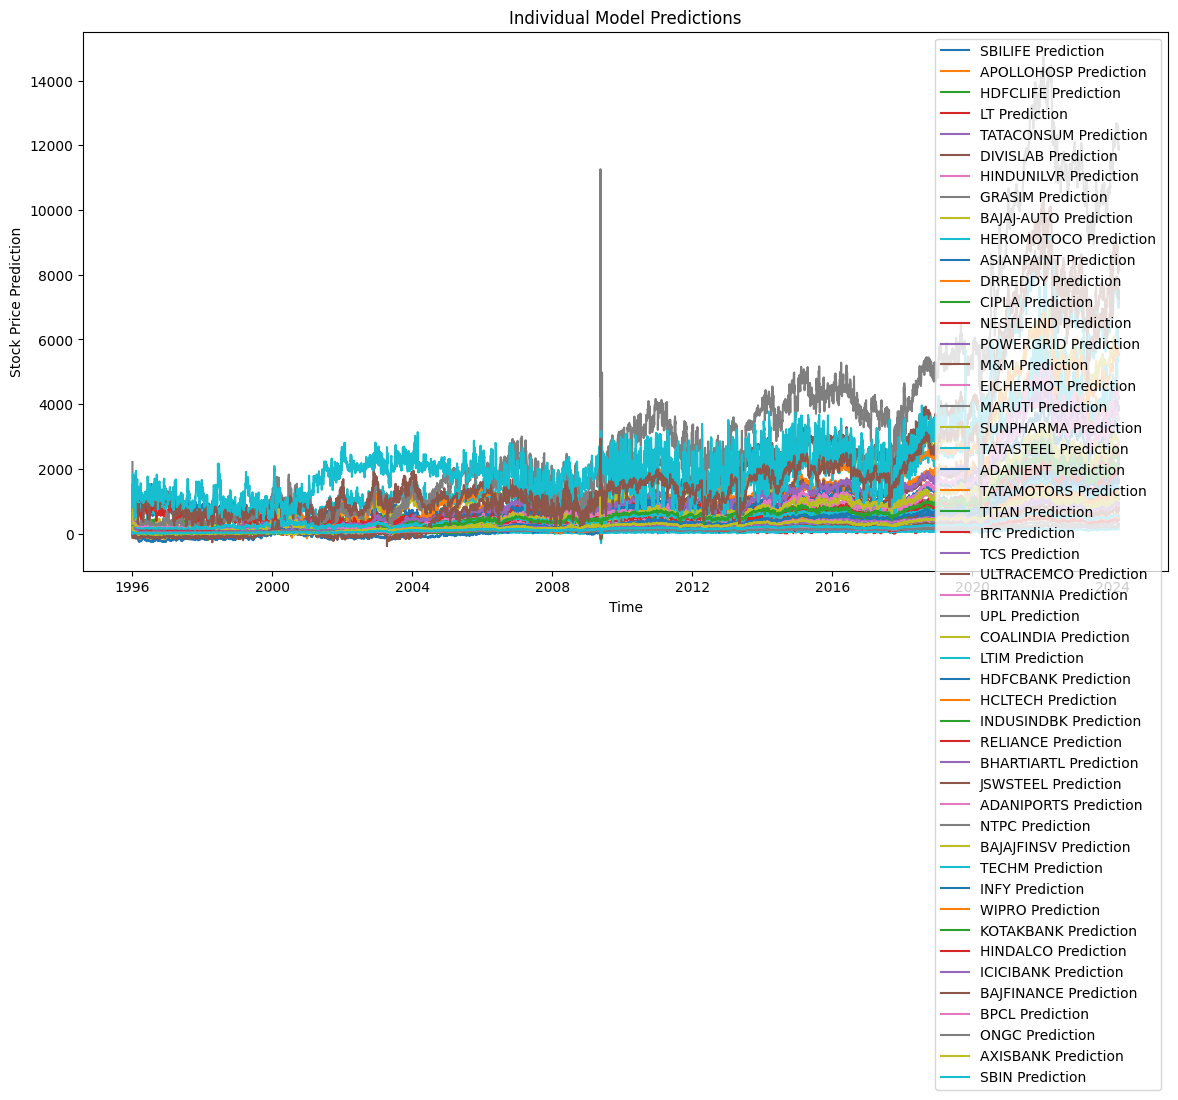

In [ ]:
# Assuming you have a time index for your testing data (adjust as needed)
time_index = test_data.index

# Plot individual predictions
plt.figure(figsize=(14, 7))
for i, symbol in enumerate(symbols):
    plt.plot(time_index, individual_predictions[i], label=f'{symbol} Prediction')

plt.xlabel('Time')
plt.ylabel('Stock Price Prediction')
plt.title('Individual Model Predictions')
plt.legend()
plt.show()


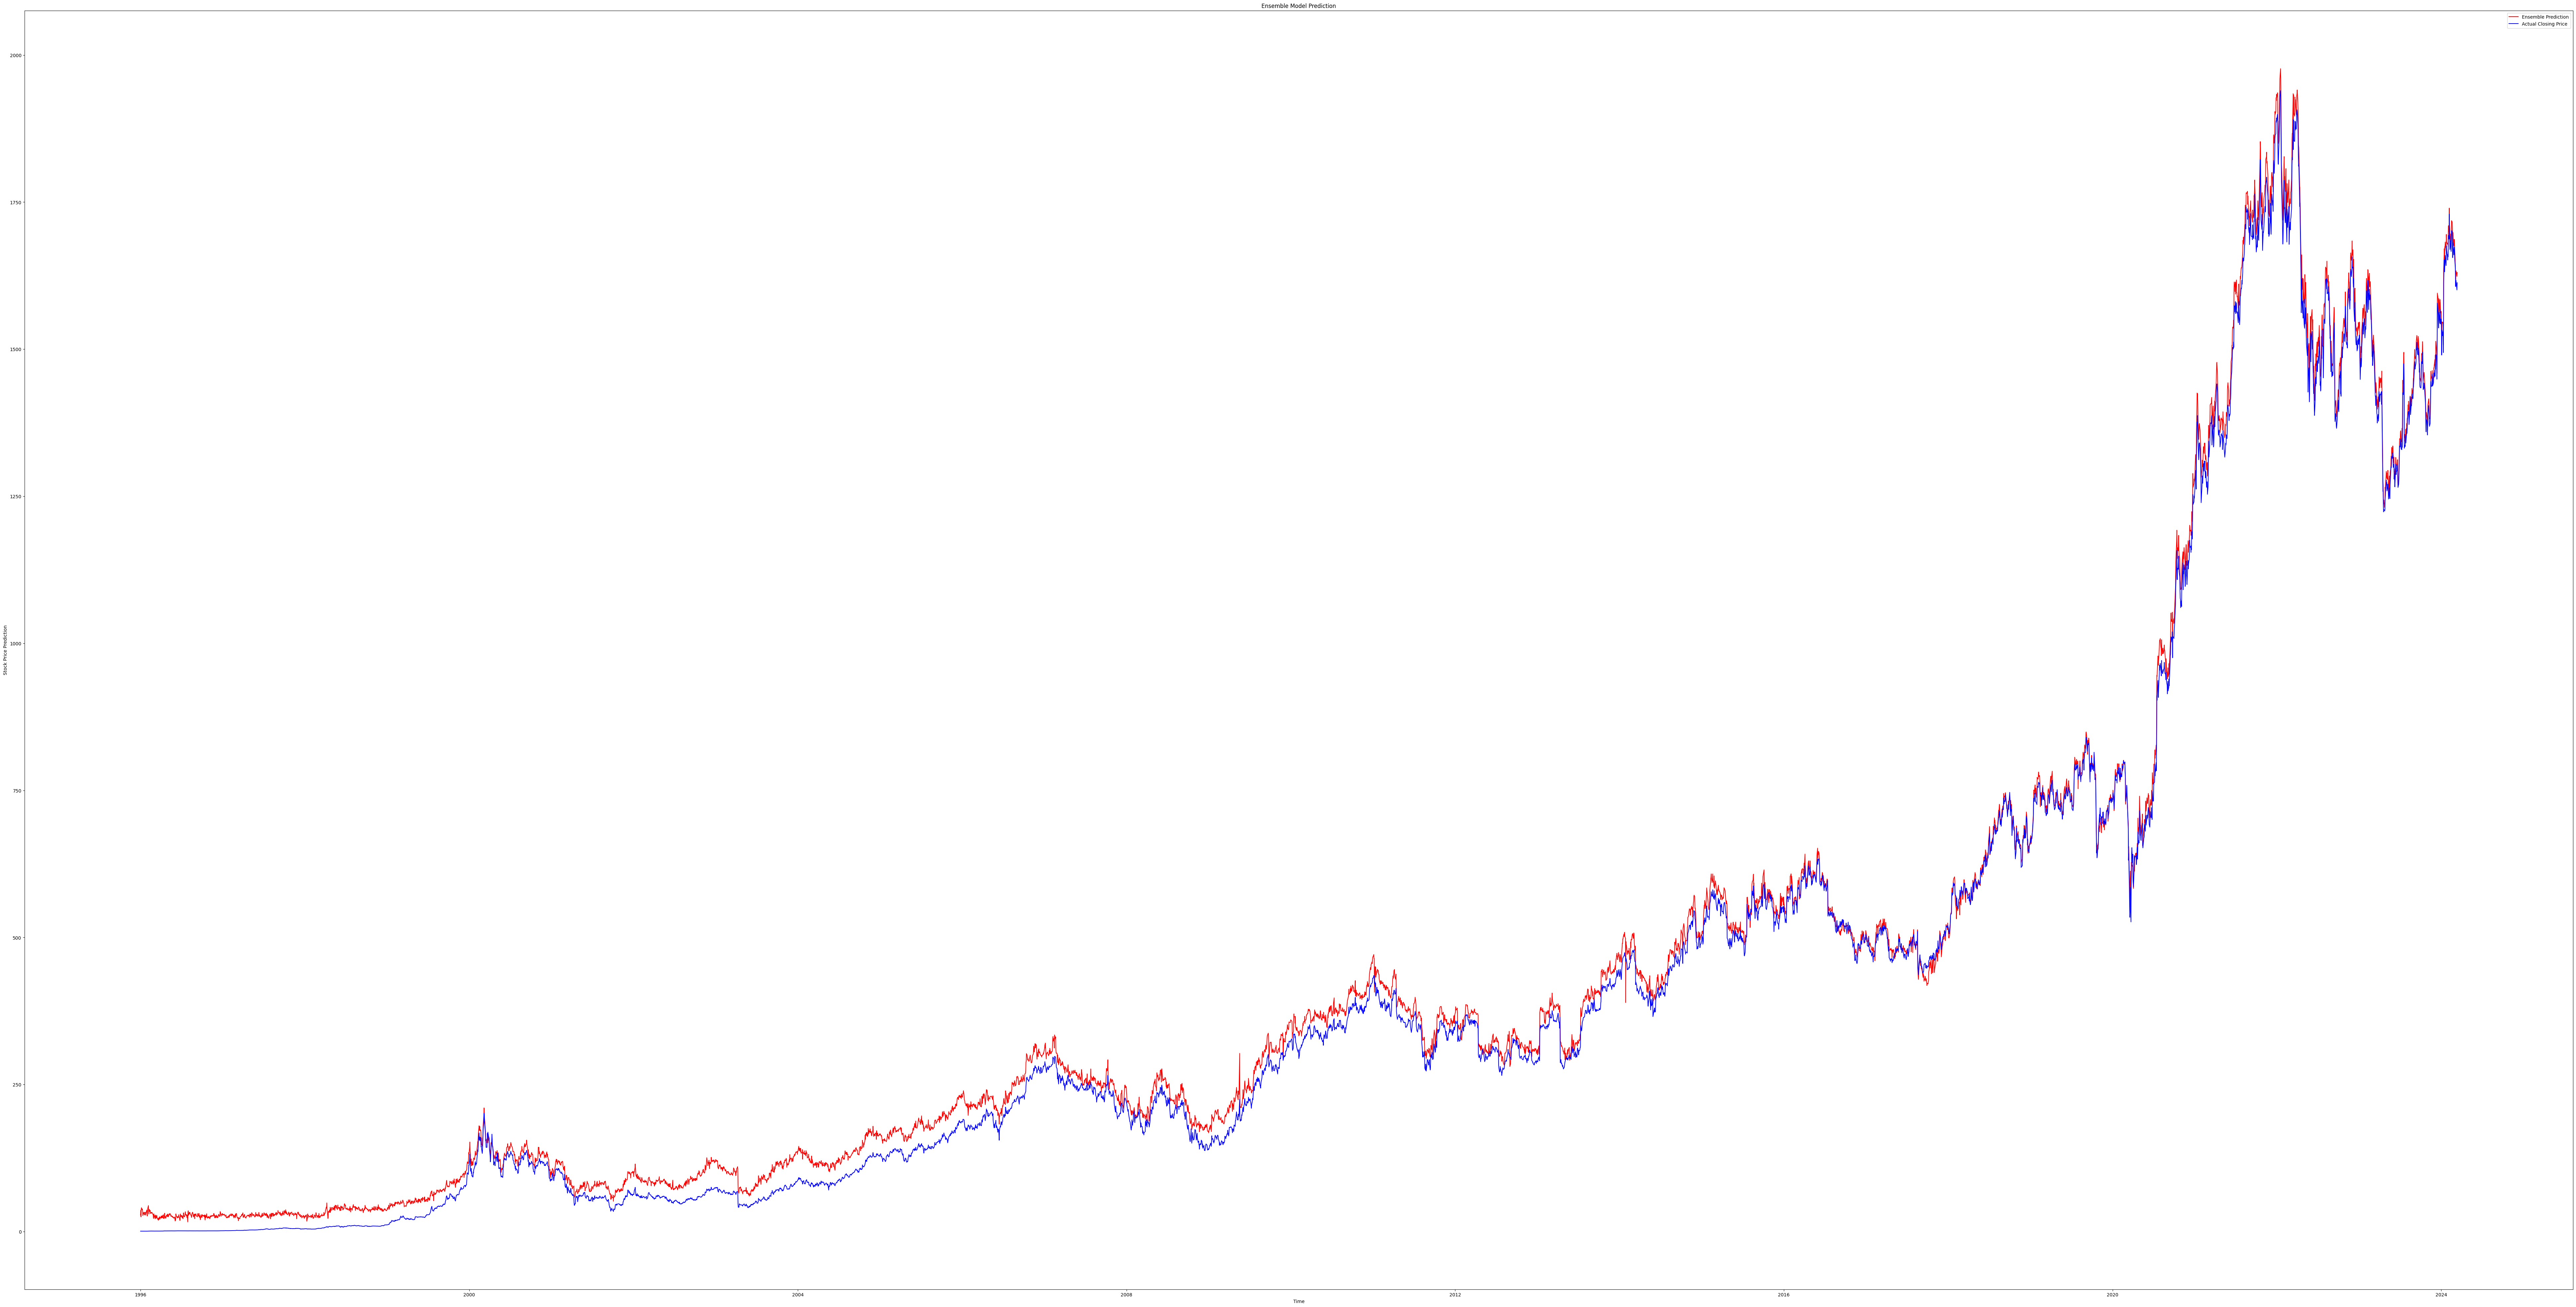

In [ ]:
# Plot ensemble predictions
plt.figure(figsize=(99, 50))
plt.plot(time_index, ensemble_predictions_combined, label='Ensemble Prediction', color='red')
plt.plot(test_data.index, y_test, label='Actual Closing Price',color = 'blue') #marker='o')
plt.xlabel('Time')
plt.ylabel('Stock Price Prediction')
plt.title('Ensemble Model Prediction')
plt.legend()
plt.show()


In [ ]:


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
mse = mean_squared_error(y_test, ensemble_predictions_combined)
mae = mean_absolute_error(y_test, ensemble_predictions_combined)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 656.5836822668455
Mean Absolute Error (MAE): 23.097947252535864


In [ ]:


# Calculate the accuracy
accuracy = 100 - (mae / np.mean(y_test)) * 100

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 94.48%
